<img src="media/missin_data_cover.jpeg" style="width: 1024px; height: 512px; object-fit: cover;">

# Curso de manejo de datos faltantes

*Profesor: Jes√∫s V√©lez*

# Configuraci√≥n de ambiente de trabajo

- Actualizar e instalar librer√≠as

!pip install --upgrade pip

In [1]:
#!pip install --upgrade pip

!pip install pyjanitor matplotlib missingno numpy pandas pyreadr seaborn session-info upsetplot

In [2]:
#!pip install -r requirements.txt

Estas lineas se ejecutar√°n de manera autom√°tica al iniciar este notebook en Deepnote, ya que requeriments.txt se instalar√° de manera autom√°tica al iniciar el entorno

## Importar libreras

In [3]:
import janitor
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
import session_info
import upsetplot

## Configuraci√≥n de aspecto de las gr√°ficas

In [4]:
%matplotlib inline

sns.set(
    rc={
        "figure.figsize": (10, 10)
    }
)

sns.set_style("whitegrid")

# Operaciones con valores faltantes

## Python

## NumPy

In [5]:
print(
    None or True,
    None or False,
    None == None,
    None is None,
    #None + True, #TypeError: unsupported operand type(s) for +: 'NoneType' and 'bool'
    #None / False, #TypeError: unsupported operand type(s) for /: 'NoneType' and 'bool'
    type(None),
    sep="\n"
)

True
False
True
True
<class 'NoneType'>


In [6]:
print(
    np.nan or True,
    np.nan or False,
    np.nan == np.nan,
    np.nan is np.nan,
    np.nan / 2,
    np.nan * 7,
    type(np.nan),
    np.isnan(np.nan),
    sep="\n"
)

nan
nan
False
True
nan
nan
<class 'float'>
True


## Pandas

In [7]:
test_missing_df = pd.DataFrame.from_dict(
    data=dict(
        x=[0, 1, np.nan, np.nan, None],
        y=[0, 1, pd.NA, np.nan, None]
    )
)

test_missing_df

x     y
0  0.0     0
1  1.0     1
2  NaN  <NA>
3  NaN   NaN
4  NaN  None

In [8]:
test_missing_df.isna()

x      y
0  False  False
1  False  False
2   True   True
3   True   True
4   True   True

In [9]:
test_missing_df.isnull()

x      y
0  False  False
1  False  False
2   True   True
3   True   True
4   True   True

In [10]:
pd.Series([pd.to_datetime("2022-01-01"), np.nan])

0   2022-01-01
1          NaT
dtype: datetime64[ns]

In [11]:
pd.Series([-1]).isnull()

0    False
dtype: bool

# Cargando los conjuntos de datos

## Pima Indian Diabetes Dataset

In [12]:
#pima_indians_diabetes_url = "https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv"

Utilizamos el siguiente comando para realizar la descarga de los archivos

In [13]:
#!wget -O /work/data/pima-indians-diabetes.csv { pima_indians_diabetes_url } -q

In [14]:
diabetes_df = pd.read_csv(
    filepath_or_buffer="data/pima-indians-diabetes.csv", # or pima_indians_diabetes_url
    sep=",",
    names=[
        "pregnancies",
        "glucose",
        "blood_pressure",
        "skin_thickness",
        "insulin",
        "bmi",
        "diabetes_pedigree_function",
        "age",
        "outcome",
    ]
)

diabetes_df

pregnancies  glucose blood_pressure skin_thickness  insulin   bmi  \
0    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
1              6      148             72             35        0  33.6   
2              1       85             66             29        0  26.6   
3              8      183             64              0        0  23.3   
4              1       89             66             23       94  28.1   
..           ...      ...            ...            ...      ...   ...   
764           10      101             76             48      180  32.9   
765            2      122             70             27        0  36.8   
766            5      121             72             23      112  26.2   
767            1      126             60              0        0  30.1   
768            1       93             70             31        0  30.4   

    diabetes_pedigree_function  age  outcome  
0     DiabetesPedigreeFunction  Age  Outcome  
1                        0.627   50        1  
2                        0.351   31        0  
3                        0.672   32        1  
4                        0.167   21        0  
..                         ...  ...      ...  
764                      0.171   63        0  
765                       0.34   27        0  
766                      0.245   30        0  
767                      0.349   47        1  
768                      0.315   23        0  

[769 rows x 9 columns]

## naniar (oceanbuoys, pedestrian, riskfactors)

In [15]:
base_url = "https://github.com/njtierney/naniar/raw/master/data/"
datasets_names = ("oceanbuoys", "pedestrian", "riskfactors")
extension = ".rda"

In [16]:
datasets_dfs = {}

for dataset_name in datasets_names:

    dataset_file = f"{ dataset_name }{ extension }"
    dataset_output_file = f"./data/{ dataset_file }"
    dataset_url = f"{ base_url }{ dataset_file }"
    
    !wget -q -O { dataset_output_file } { dataset_url }

    datasets_dfs[f"{ dataset_name }_df"] = pyreadr.read_r(dataset_output_file).get(dataset_name)

datasets_dfs.keys()

zsh:1: command not found: wget


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=51239) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


zsh:1: command not found: wget


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=51239) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


zsh:1: command not found: wget


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=51239) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


dict_keys(['oceanbuoys_df', 'pedestrian_df', 'riskfactors_df'])

## Incluir los datasets al entorno local

In [17]:
locals().update(**datasets_dfs)
del datasets_dfs

## Verificar la carga

In [18]:
oceanbuoys_df.shape, pedestrian_df.shape, riskfactors_df.shape, diabetes_df.shape

((736, 8), (37700, 9), (245, 34), (769, 9))

# Tabulaci√≥n de datos faltantes

<hr>

> Extensi√≥n de la librer√≠a Pandas

Para las siguientes secciones, podemos hacer uso de las extensiones para la librer√≠a de pandas brindadas, las cuales est√°n contenidas en la siguiente notebook

In [19]:
#!pip install nbformat

In [20]:

%run pandas-missing-extension.ipynb #La extensi√≥n tendr√° por nombre "missing"

<hr>

In [21]:
riskfactors_df.isna()

state    sex    age  weight_lbs  height_inch    bmi  marital  pregnant  \
0    False  False  False       False        False  False    False      True   
1    False  False  False       False        False  False    False      True   
2    False  False  False       False        False  False    False      True   
3    False  False  False       False        False  False    False      True   
4    False  False  False       False        False  False    False      True   
..     ...    ...    ...         ...          ...    ...      ...       ...   
240  False  False  False       False        False  False    False      True   
241  False  False  False       False        False  False    False      True   
242  False  False  False       False        False  False    False      True   
243  False  False  False       False        False  False    False      True   
244  False  False  False       False        False  False    False      True   

     children  education  ...  smoke_100  smoke_days  smoke_stop  smoke_last  \
0       False      False  ...      False        True        True        True   
1       False      False  ...      False        True        True        True   
2       False      False  ...      False        True        True        True   
3       False      False  ...      False        True        True        True   
4       False      False  ...      False       False       False        True   
..        ...        ...  ...        ...         ...         ...         ...   
240     False      False  ...      False        True        True        True   
241     False      False  ...      False        True        True        True   
242     False      False  ...      False       False        True       False   
243     False      False  ...      False       False       False        True   
244     False      False  ...      False       False        True       False   

     diet_fruit  diet_salad  diet_potato  diet_carrot  diet_vegetable  \
0         False       False        False        False           False   
1         False       False        False        False           False   
2         False       False        False        False           False   
3          True        True         True         True            True   
4         False       False        False        False           False   
..          ...         ...          ...          ...             ...   
240       False       False        False        False           False   
241       False       False        False        False           False   
242       False       False        False        False           False   
243       False       False        False        False           False   
244       False       False        False        False           False   

     diet_juice  
0         False  
1         False  
2         False  
3          True  
4         False  
..          ...  
240       False  
241       False  
242       False  
243       False  
244       False  

[245 rows x 34 columns]

## Res√∫menes b√°sicos de valores faltantes

riskfactors_df.shape

riskfactors_df.missing.number_complete()

riskfactors_df.missing.number_missing()

riskfactors_df.missing.missing_variable_summary()

riskfactors_df.missing.missing_variable_table()

riskfactors_df.missing.missing_case_summary()

riskfactors_df.missing.missing_case_table()

(
    riskfactors_df
    .missing
    .missing_variable_span(
        variable="weight_lbs",
        span_every=50
    )
)

(
    riskfactors_df
    .missing
    .missing_variable_run(
        variable="weight_lbs"
    )
)


In [22]:
#Cantidad de (Registos, Variabbles) en nuestro dataset 
riskfactors_df.shape

(245, 34)

In [23]:
#Cantidad de "variables"
len(riskfactors_df.columns)

34

In [24]:
#Nombre de las variables
riskfactors_df.columns

Index(['state', 'sex', 'age', 'weight_lbs', 'height_inch', 'bmi', 'marital',
       'pregnant', 'children', 'education', 'employment', 'income', 'veteran',
       'hispanic', 'health_general', 'health_physical', 'health_mental',
       'health_poor', 'health_cover', 'provide_care', 'activity_limited',
       'drink_any', 'drink_days', 'drink_average', 'smoke_100', 'smoke_days',
       'smoke_stop', 'smoke_last', 'diet_fruit', 'diet_salad', 'diet_potato',
       'diet_carrot', 'diet_vegetable', 'diet_juice'],
      dtype='object')

<hr>

In [25]:
print(riskfactors_df.missing.number_missing())

1186


> Versi√≥n pura en Pandas

In [26]:
print(riskfactors_df.isna().sum().sum())

1186


El primer .sum() da como resultado la cantidad de nulos en cada columna y entrega la tabla de columna:nulos -> Aplicar un segundo .sum() sumar√° todas las cantidades de cada columna para entregar la cantidad de elementos totales faltantes a lo largo de todo el dataset.

<hr>

In [27]:
#Cantidad de elementos de nuestro dataset que no son vacios
print(riskfactors_df.missing.number_complete())

7144


> Versi√≥n pura en Pandas

In [28]:
print(riskfactors_df.size - riskfactors_df.isna().sum().sum())

7144


<hr>

In [29]:
'''
La funci√≥n missing_variable_summary devuelve un DataFrame que contiene 
un resumen de las variables faltantes en el DataFrame original. 
Este resumen incluye el n√∫mero de valores faltantes y el porcentaje de 
valores faltantes para cada variable.
'''
riskfactors_df.missing.missing_variable_summary()

variable  n_missing  n_cases  pct_missing
0              state          0      245     0.000000
1                sex          0      245     0.000000
2                age          0      245     0.000000
3         weight_lbs         10      245     4.081633
4        height_inch          2      245     0.816327
5                bmi         11      245     4.489796
6            marital          1      245     0.408163
7           pregnant        215      245    87.755102
8           children          0      245     0.000000
9          education          1      245     0.408163
10        employment          0      245     0.000000
11            income          0      245     0.000000
12           veteran          3      245     1.224490
13          hispanic          2      245     0.816327
14    health_general          0      245     0.000000
15   health_physical          0      245     0.000000
16     health_mental          0      245     0.000000
17       health_poor        113      245    46.122449
18      health_cover          0      245     0.000000
19      provide_care          3      245     1.224490
20  activity_limited          3      245     1.224490
21         drink_any          2      245     0.816327
22        drink_days        134      245    54.693878
23     drink_average        135      245    55.102041
24         smoke_100          2      245     0.816327
25        smoke_days        128      245    52.244898
26        smoke_stop        212      245    86.530612
27        smoke_last        161      245    65.714286
28        diet_fruit          8      245     3.265306
29        diet_salad          8      245     3.265306
30       diet_potato          8      245     3.265306
31       diet_carrot          8      245     3.265306
32    diet_vegetable          8      245     3.265306
33        diet_juice          8      245     3.265306

> Versi√≥n pura en Pandas

In [30]:
riskfactors_df.isnull().pipe(
    # Usa pipe para encadenar operaciones de manera m√°s legible
    lambda df_1: (
        # Suma los valores True en cada columna para contar los valores faltantes
        df_1.sum()
        # Convierte el √≠ndice en una columna y nombra la nueva columna como "n_missing"
        .reset_index(name="n_missing")
        # Renombra la columna "index" a "variable"
        .rename(columns={"index": "variable"})
        # Asigna nuevas columnas al DataFrame
        .assign(
            # n_cases: N√∫mero total de filas en el DataFrame original
            n_cases=len(df_1),
            # pct_missing: Porcentaje de valores faltantes para cada variable
            pct_missing=lambda df_2: df_2.n_missing / df_2.n_cases * 100,
        )
    )
)

variable  n_missing  n_cases  pct_missing
0              state          0      245     0.000000
1                sex          0      245     0.000000
2                age          0      245     0.000000
3         weight_lbs         10      245     4.081633
4        height_inch          2      245     0.816327
5                bmi         11      245     4.489796
6            marital          1      245     0.408163
7           pregnant        215      245    87.755102
8           children          0      245     0.000000
9          education          1      245     0.408163
10        employment          0      245     0.000000
11            income          0      245     0.000000
12           veteran          3      245     1.224490
13          hispanic          2      245     0.816327
14    health_general          0      245     0.000000
15   health_physical          0      245     0.000000
16     health_mental          0      245     0.000000
17       health_poor        113      245    46.122449
18      health_cover          0      245     0.000000
19      provide_care          3      245     1.224490
20  activity_limited          3      245     1.224490
21         drink_any          2      245     0.816327
22        drink_days        134      245    54.693878
23     drink_average        135      245    55.102041
24         smoke_100          2      245     0.816327
25        smoke_days        128      245    52.244898
26        smoke_stop        212      245    86.530612
27        smoke_last        161      245    65.714286
28        diet_fruit          8      245     3.265306
29        diet_salad          8      245     3.265306
30       diet_potato          8      245     3.265306
31       diet_carrot          8      245     3.265306
32    diet_vegetable          8      245     3.265306
33        diet_juice          8      245     3.265306

<hr>

In [31]:
#Este c√≥digo previamente no funcionaba desde Deepnote, pero s√≠ al ejecutarlo en local
riskfactors_df.missing.missing_variable_table()

n_missing_in_variable  n_variables  pct_variables
0                       0           10      29.411765
1                       8            6      17.647059
2                       2            4      11.764706
3                       3            3       8.823529
4                       1            2       5.882353
5                      10            1       2.941176
6                      11            1       2.941176
7                     113            1       2.941176
8                     128            1       2.941176
9                     134            1       2.941176
10                    135            1       2.941176
11                    161            1       2.941176
12                    212            1       2.941176
13                    215            1       2.941176

> Versi√≥n hecha con m√©todos en pandas, pero reciclando una funci√≥n de "missing" para simplificar el c√≥digo

In [32]:
riskfactors_df.missing.missing_variable_summary().value_counts("n_missing").reset_index().rename(
    columns={"n_missing": "n_missing_in_variable", 
    "count": "n_variables"}).assign(
        pct_variables=lambda df: df.n_variables / df.n_variables.sum() * 100
        ).sort_values("pct_variables", 
        ascending=False)

n_missing_in_variable  n_variables  pct_variables
0                       0           10      29.411765
1                       8            6      17.647059
2                       2            4      11.764706
3                       3            3       8.823529
4                       1            2       5.882353
5                      10            1       2.941176
6                      11            1       2.941176
7                     113            1       2.941176
8                     128            1       2.941176
9                     134            1       2.941176
10                    135            1       2.941176
11                    161            1       2.941176
12                    212            1       2.941176
13                    215            1       2.941176

In [33]:
#En cada linea se muestra el registro correspondiente, la cantidad de variables faltantes 
#y el porcentaje de valores faltantes que corresponde en la totalidad del dataset.
riskfactors_df.missing.missing_case_summary()

case  n_missing  pct_missing
0       0          6    16.666667
1       1          6    16.666667
2       2          7    19.444444
3       3         12    33.333333
4       4          5    13.888889
..    ...        ...          ...
240   240          6    16.666667
241   241          5    13.888889
242   242          3     8.333333
243   243          2     5.555556
244   244          3     8.333333

[245 rows x 3 columns]

In [34]:
riskfactors_df.missing.missing_case_table()

n_missing_in_case  n_cases   pct_case
0                   4       49  20.000000
1                   5       45  18.367347
2                   7       39  15.918367
3                   6       36  14.693878
4                   2       31  12.653061
5                   3       30  12.244898
6                   1        4   1.632653
7                   8        3   1.224490
8                  12        3   1.224490
9                  15        2   0.816327
10                  9        1   0.408163
11                 10        1   0.408163
12                 11        1   0.408163

In [35]:
#El siguiente c√≥digo mostrar√°:
#la cantidad de variables que faltan -> en cu√°ntos casos -> y el porcentaje que representan
riskfactors_df.missing.missing_case_summary().value_counts("n_missing").reset_index().rename(
    columns={"n_missing": 
    "n_missing_in_case", 
    "count": "n_cases"}).assign(
        pct_case=lambda df: df.n_cases / df.n_cases.sum() * 100
        ).sort_values("pct_case", ascending=False)

n_missing_in_case  n_cases   pct_case
0                   4       49  20.000000
1                   5       45  18.367347
2                   7       39  15.918367
3                   6       36  14.693878
4                   2       31  12.653061
5                   3       30  12.244898
6                   1        4   1.632653
7                   8        3   1.224490
8                  12        3   1.224490
9                  15        2   0.816327
10                  9        1   0.408163
11                 10        1   0.408163
12                 11        1   0.408163

In [36]:
#La siguiente funci√≥n crear√° grupos de tama√±o del 'span' dado.
#En este caso, el span es de 50 -> grupos de 50 registros
#Adem√°s, se usar√° la variable 'weight_lbs' para identificar si el dato es faltante
#Entonces, se obtendra un resumen de los grupos de 50 y cu√°ntos valores faltantes hay en cada grupo
(
    riskfactors_df
    .missing
    .missing_variable_span(
        variable="weight_lbs",
        span_every=50
    )
)

span_counter  n_missing  n_complete  pct_missing  pct_complete
0             0          1          49     2.000000     98.000000
1             1          5          45    10.000000     90.000000
2             2          1          49     2.000000     98.000000
3             3          1          49     2.000000     98.000000
4             4          2          43     4.444444     95.555556

Sugerencia: Utilizar esta misma l√≥gica para crear una funci√≥n que muestre de manera visual el resultado para identificar si existe una distribuci√≥n de los datos faltantes de manera agrupada

In [37]:
#Esta funci√≥n mostrar√° la cantidad de registros sin elementos faltantes, antes de que aparezca n-anomalias
#que poseen datos faltantes
(
    riskfactors_df
    .missing
    .missing_variable_run(
        variable="weight_lbs"
    )
)

run_length     is_na
0           14  complete
1            1   missing
2           45  complete
3            1   missing
4            5  complete
5            1   missing
6           12  complete
7            1   missing
8           10  complete
9            2   missing
10          40  complete
11           1   missing
12          53  complete
13           1   missing
14          14  complete
15           1   missing
16          31  complete
17           1   missing
18          11  complete

# Visualizaci√≥n de datos faltantes

## Visualizaci√≥n en funci√≥n de cada variable por separado

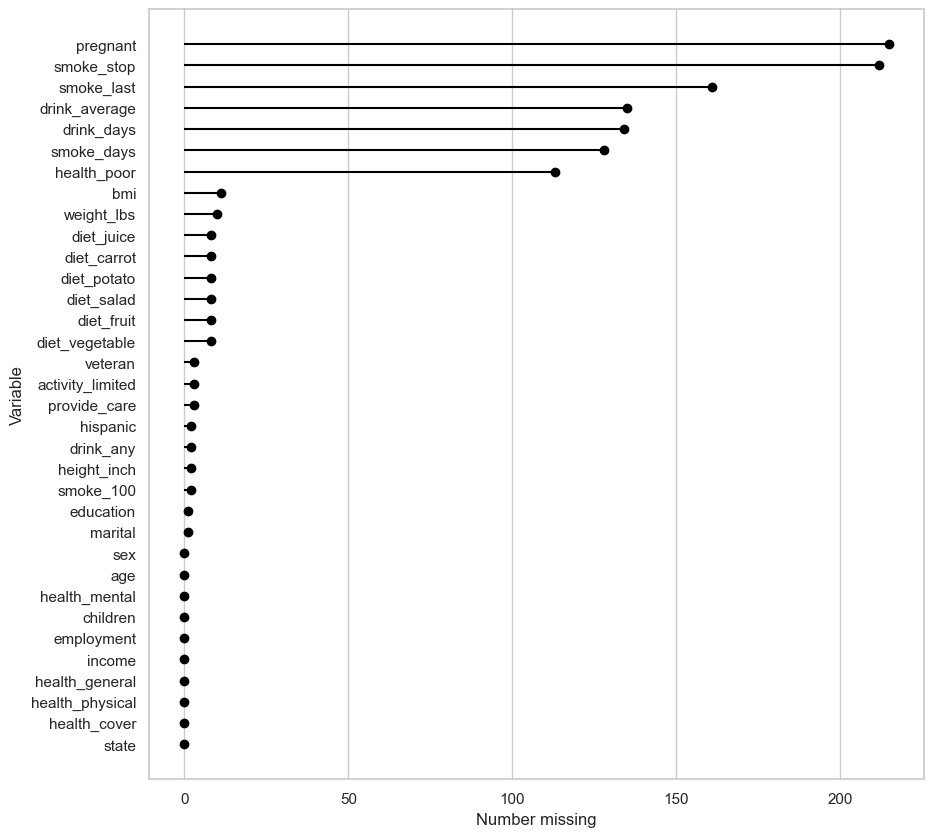

In [38]:
riskfactors_df.missing.missing_variable_plot()

## Visualizaci√≥n por caso/columna/fila 

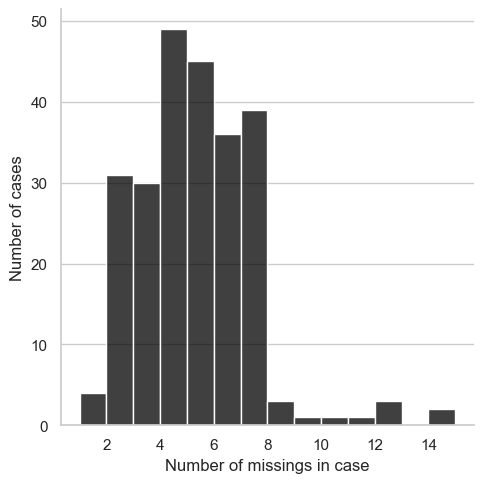

In [39]:
riskfactors_df.missing.missing_case_plot()

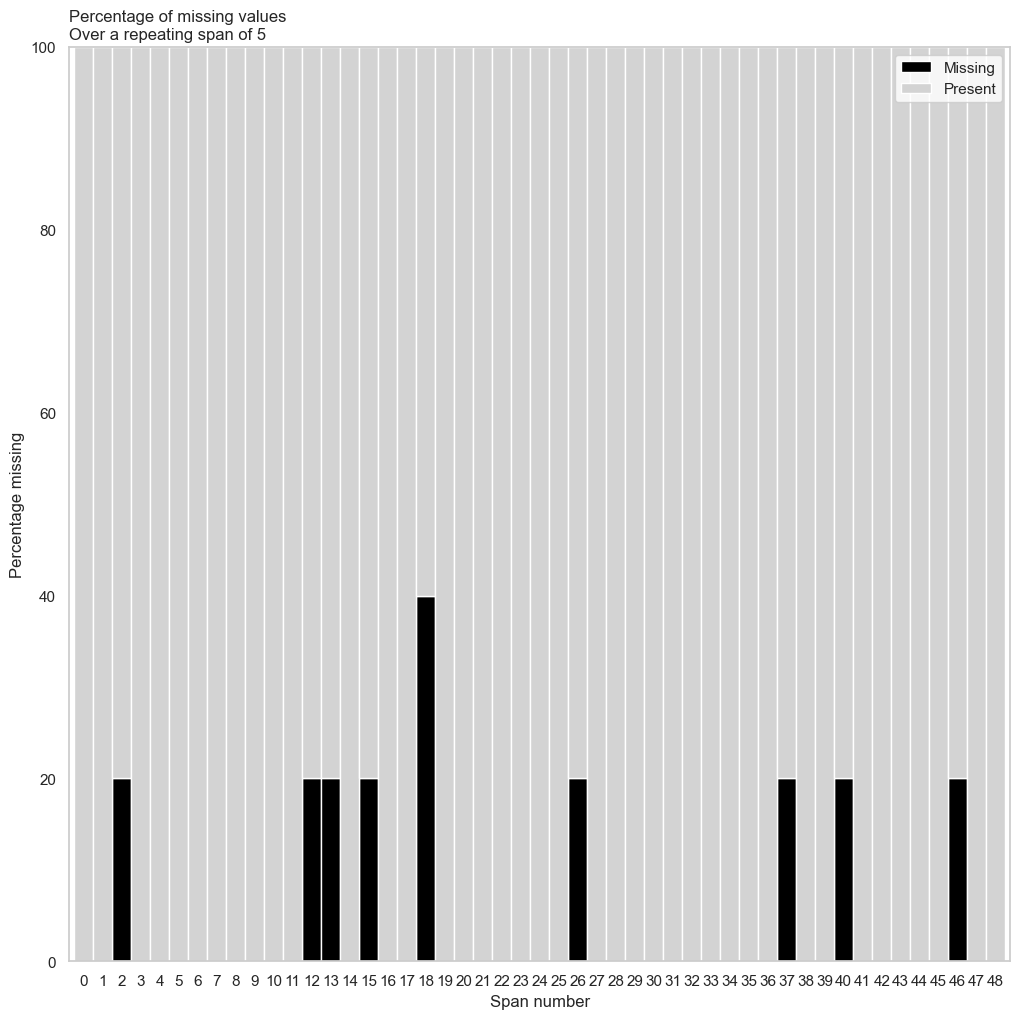

In [40]:
(
    riskfactors_df
    .missing
    .missing_variable_span_plot(
        variable="weight_lbs",
        span_every=5,
        rot = 0
    )
)

<Axes: >

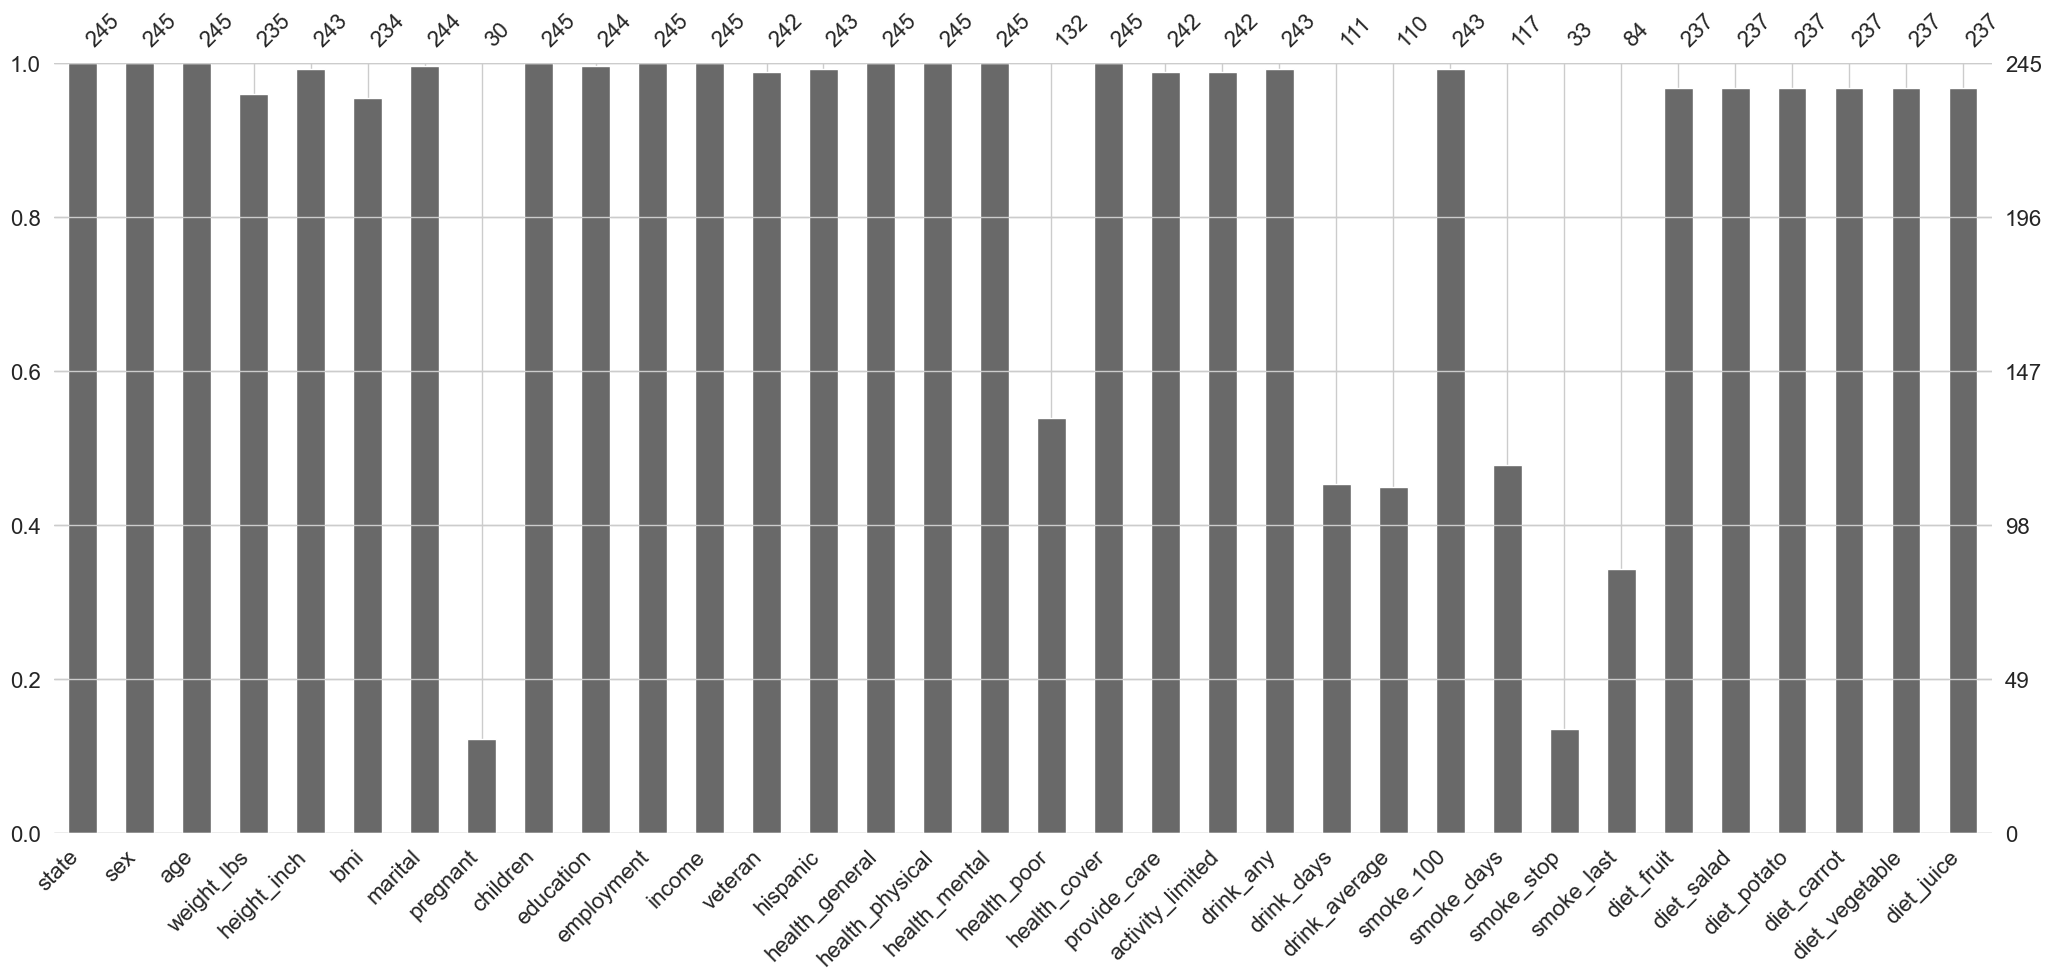

In [41]:
missingno.bar(riskfactors_df)

<Axes: >

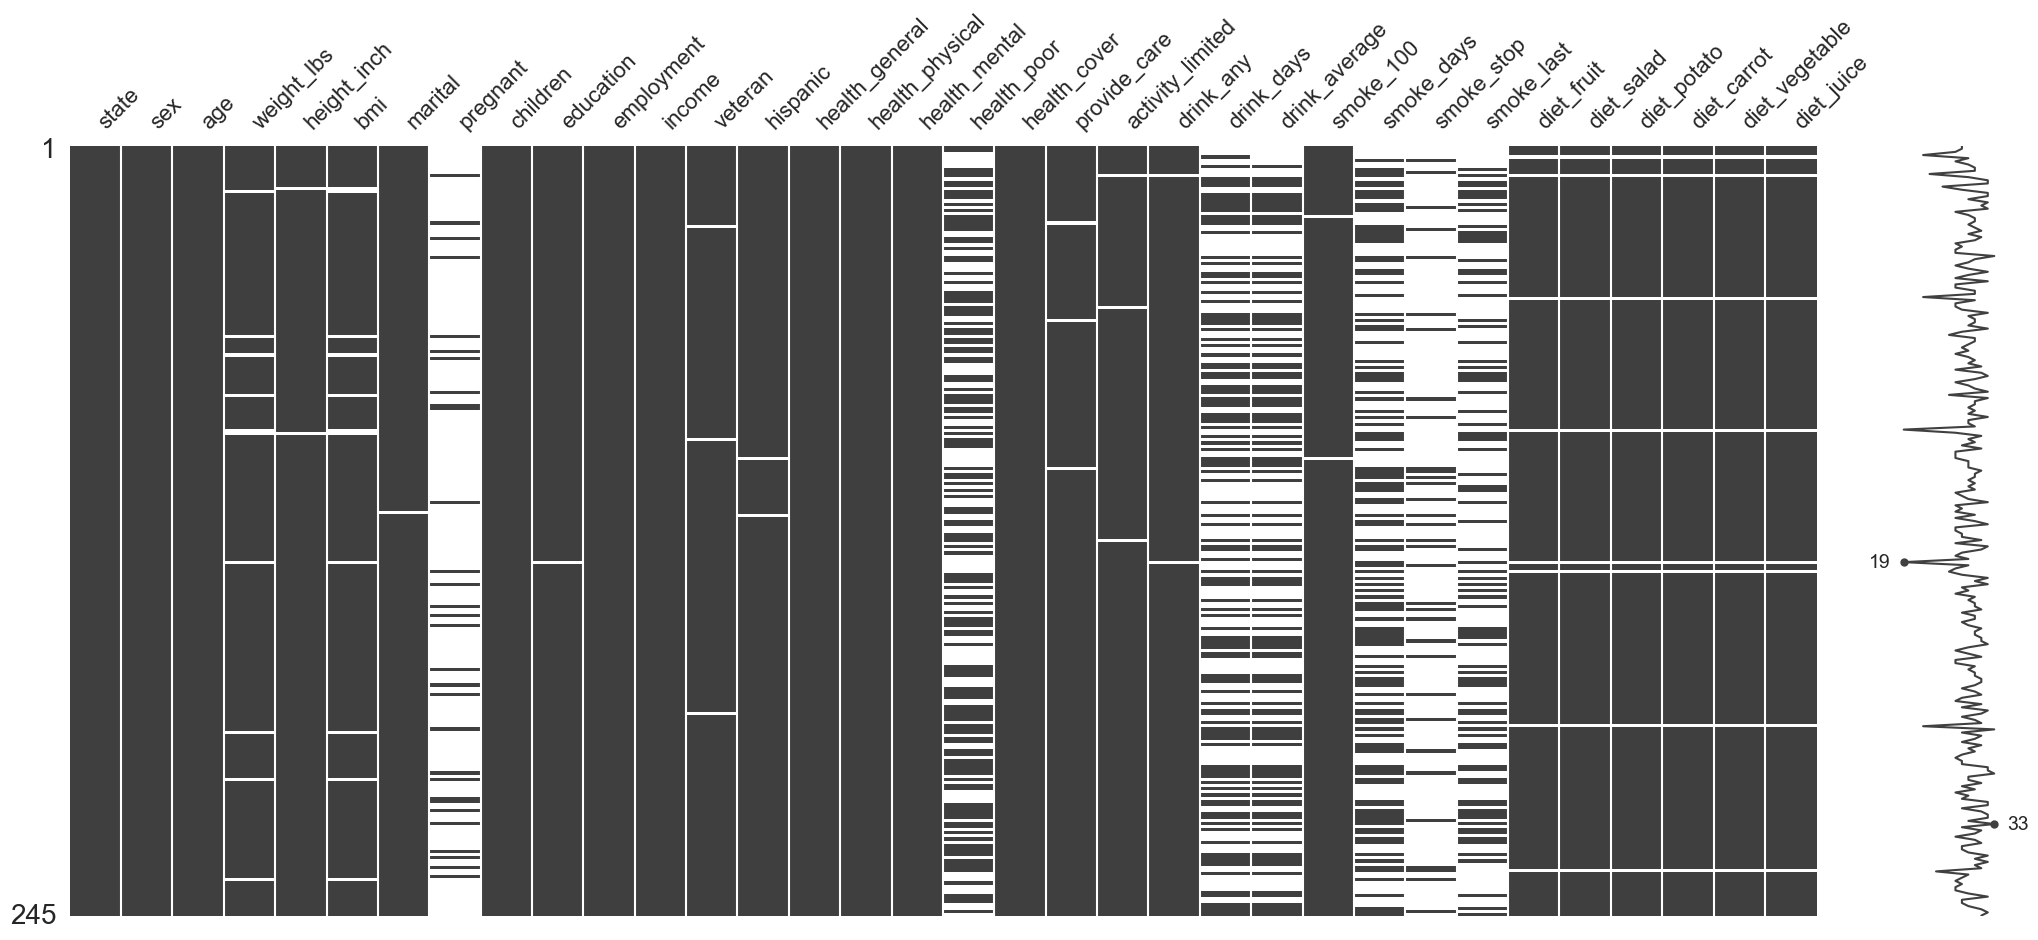

In [42]:
missingno.matrix(riskfactors_df)

<Axes: >

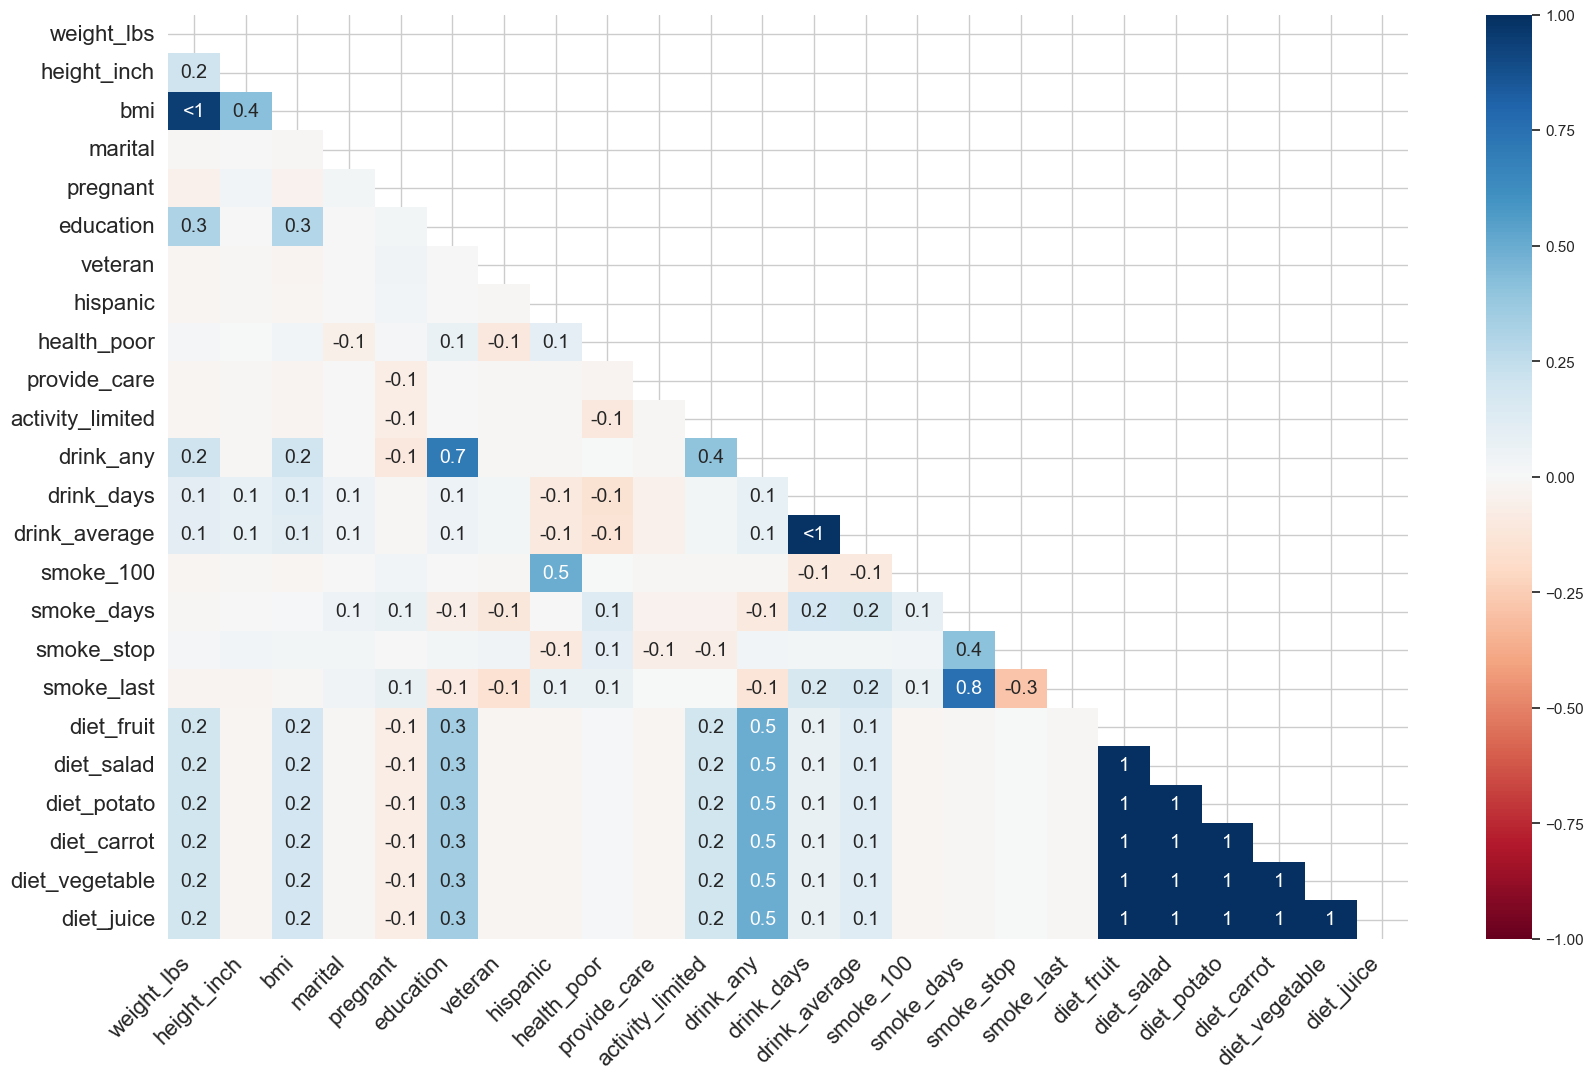

In [43]:
missingno.heatmap(riskfactors_df)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

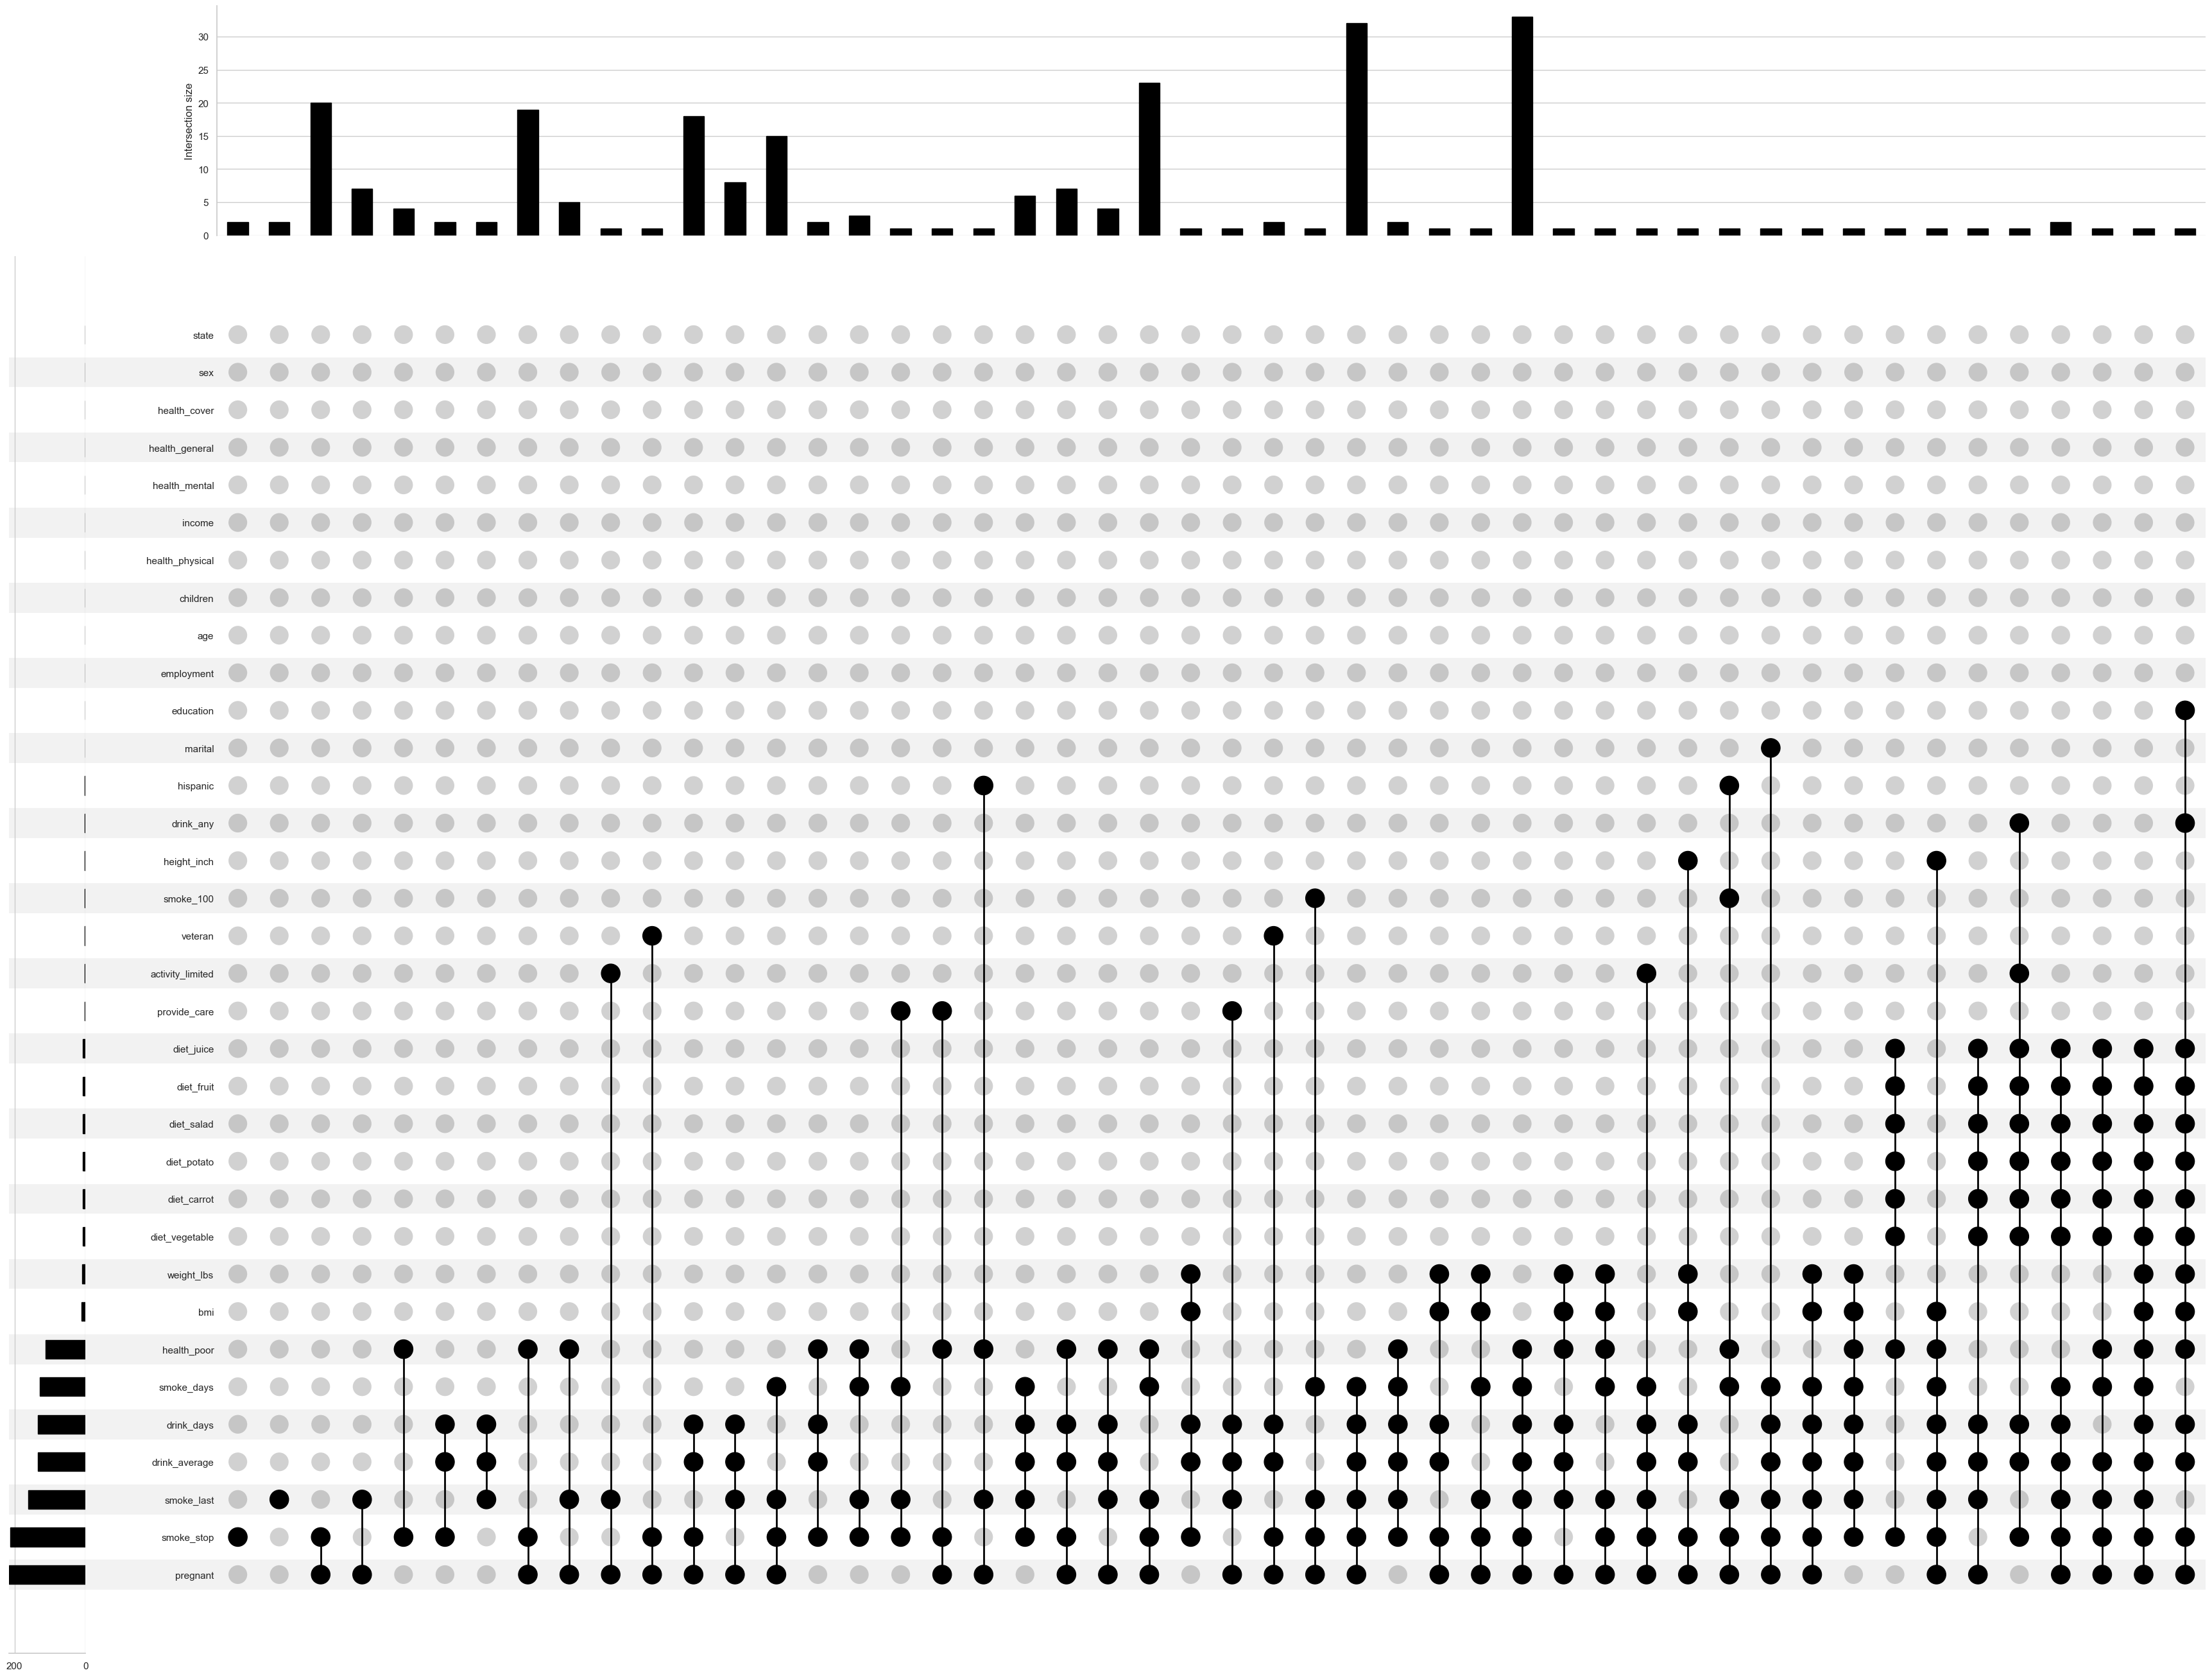

In [44]:
(
    riskfactors_df
    .missing
    .missing_upsetplot(
        variables = None,
        element_size = 60
    )
)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

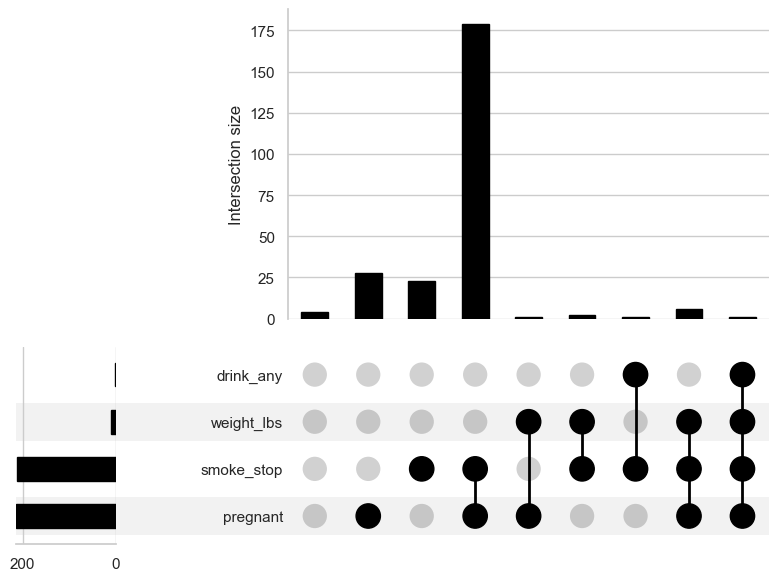

In [45]:
(
    riskfactors_df
    .missing
    .missing_upsetplot(
        variables = ["weight_lbs", "pregnant", "smoke_stop", "drink_any"],
        element_size = 50
    )
)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8e3578bb-242c-4dfe-99a9-1c9f6db2bee5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

---

# Codificaci√≥n de valores faltantes

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">üöß Advertencia</b>
    <p>
    Al igual que cada persona es una nueva puerta a un mundo diferente, <u>los <b>valores faltantes</b> existen en diferentes formas y colores</u>. Al trabajar con valores faltantes ser√° cr√≠tico entender sus distintas representaciones. A pesar de que el conjunto de datos de trabajo pareciera que no contiene valores faltantes, deber√°s ser capaz de ir m√°s all√° de lo observado a simple vista para remover el manto tras el cual se esconde lo desconocido.
    </p>
</div>

## Valores comunmente asociados a los valores faltantes

### Cadenas de texto

In [46]:
common_na_strings = (
    "missing",
    "NA",
    "N A",
    "N/A",
    "#N/A",
    "NA ",
    " NA",
    "N /A",
    "N / A",
    " N / A",
    "N / A ",
    "na",
    "n a",
    "n/a",
    "na ",
    " na",
    "n /a",
    "n / a",
    " a / a",
    "n / a ",
    "NULL",
    "null",
    "",
    "?",
    "*",
    ".",
)

### Valores num√©ricos asociados

In [47]:
common_na_numbers = (-9, -99, -999, -9999, 9999, 66, 77, 88, -1)

## ¬øC√≥mo encontrarlos dentro de un dataset?

In [48]:
missing_data_example_df = pd.DataFrame.from_dict(
    dict(
        x = [1, 3, "NA", -99, -98, -99],
        y = ["A", "N/A", "NA", "E", "F", "G"],
        z = [-100, -99, -98, -101, -1, -1]
    )
)

missing_data_example_df

x    y    z
0    1    A -100
1    3  N/A  -99
2   NA   NA  -98
3  -99    E -101
4  -98    F   -1
5  -99    G   -1

In [49]:
how_many_in_example = missing_data_example_df.missing.number_missing()
how_many_in_example

np.int64(0)

A pesar de que en el dataframe anterior existen valores nulos, al utilizar el m√©todo que muestra la cantidad de estos valores se observa que ha contado 0 valores nulos dentro del dataframe entregado. Sin embargo, esto no es cierto, ya que podemos observar que existen. Esto se debe a que la forma en la que el m√©todo `.isna()` contabiliza estos valores son:

1. **`NaN` (Not a Number)**: Valores num√©ricos que no son n√∫meros.
2. **`None`**: Valores de tipo `None` en Python.
3. **`NaT` (Not a Time)**: Valores de tipo `datetime` que no representan un tiempo v√°lido.

Estos valores son considerados nulos y ser√°n marcados como `True` por el m√©todo `.isna()`. Cualquier otro valor ser√° marcado como `False`.

### Identificando los tipos de datos de cada columna 

Si se conoce el tipo de dato esperado de cada columna, entonce puede saberse si existen otros datos que no corresponden con el esperado y puede que se traten de datos nulos.

In [50]:
missing_data_example_df.dtypes

x    object
y    object
z     int64
dtype: object

<blockquote>
    <p>Podemos ver que los tipos de datos para <code>x</code> e <code>y</code> son objetos, cuando deber√≠an ser valores num√©ricos. Al tratarse de valores m√°s 'generales', podemos entender que existen otro tipo de datos en estas columnas.</p>
</blockquote>

### Visualizando los valores √∫nicos

As√≠ como anteriormente, si es posible conocer el tipo de datos esperados, la clasificaci√≥n, etc.; podemos identificar si existen valores extras a trav√©s de la impresi√≥n de los valores √∫nicos que contiene determinada columna.

In [51]:
missing_data_example_df.x.unique()

array([1, 3, 'NA', -99, -98], dtype=object)

In [52]:
missing_data_example_df.y.unique()

array(['A', 'N/A', 'NA', 'E', 'F', 'G'], dtype=object)

In [53]:
(
    # Select columns with data type 'object' (typically strings)
    missing_data_example_df
    .select_dtypes(object)
    # Apply the pd.unique function to each column to get unique values
    .apply(pd.unique)
)

x     [1, 3, NA, -99, -98]
y    [A, N/A, NA, E, F, G]
dtype: object

In [54]:
# Apply the pd.unique function to each column to get unique values
missing_data_example_df.apply(pd.unique)

x          [1, 3, NA, -99, -98]
y         [A, N/A, NA, E, F, G]
z    [-100, -99, -98, -101, -1]
dtype: object

Con base en lo mencionado anteriormente, si es posible conocer o se cuenta con una colecci√≥n de valores que pueden ser asociados a los valores faltantes que se nos pueden presentar, entonces podemos realizar la sustitucion de estos en diferentes etapas del proceso.

## Sustituci√≥n de valores asociados a valores faltantes

**Sustituci√≥n desde la lectura de los datos**

In [55]:
pd.read_csv("data/missing_data_enconding_example.csv")

x    y    z
0   1.0    A -100
1   3.0  NaN  -99
2   NaN  NaN  -98
3 -99.0    E -101
4 -98.0    F   -1
5 -99.0    G   -1

In [56]:
pd.read_csv("data/missing_data_enconding_example.csv",
            na_filter=True,
            na_values= [-99,-1]
            )

x    y      z
0   1.0    A -100.0
1   3.0  NaN    NaN
2   NaN  NaN  -98.0
3   NaN    E -101.0
4 -98.0    F    NaN
5   NaN    G    NaN

El par√°metro `na_filter=True` en la funci√≥n pd.read_csv de pandas activa la detecci√≥n de valores faltantes *(NaN)* en el archivo CSV. Cuando `na_filter` est√° configurado en `True`, pandas buscar√° valores que deben ser considerados como faltantes. Cabe recalcar que el valor predeterminado de este parametro es `True`.

El par√°metro `na_values` permite especificar una lista de valores adicionales que deben ser tratados como faltantes (NaN). Por lo tanto, cuando `na_filter=True`, pandas no solo detectar√° los valores vac√≠os "predeterminados" como NaN, sino que tambi√©n utilizar√° la lista de valores proporcionada en `na_values` para identificar valores faltantes adicionales.

Si na_filter=False, pandas no detectar√° valores faltantes (NaN) en el archivo CSV, incluso si se especifican valores en el par√°metro na_values. Esto significa que todos los valores en el archivo CSV ser√°n le√≠dos tal cual, sin ser interpretados como valores faltantes.

*Ejemplo...*

In [57]:
pd.read_csv("data/missing_data_enconding_example.csv",
            na_filter=False,
            na_values= [-99,-1]
            )

x    y    z
0    1    A -100
1    3  N/A  -99
2   NA   NA  -98
3  -99    E -101
4  -98    F   -1
5  -99    G   -1

**Sustituci√≥n global directa sobre el DF ya importado**

La sustituci√≥n global de valores faltantes en un DataFrame se refiere al proceso de reemplazar todos los valores que se consideran como faltantes (NaN) por un valor espec√≠fico o por alg√∫n criterio definido. Este proceso es crucial para preparar los datos antes de realizar an√°lisis o entrenar modelos de machine learning, ya que los valores faltantes pueden afectar negativamente los resultados. 

El m√©todo `replace` en pandas se utiliza para sustituir valores espec√≠ficos en un DataFrame o Serie por otros valores. Este m√©todo es muy √∫til cuando se necesita limpiar o transformar datos. El m√©todo `replace` puede aceptar varios tipos de argumentos para especificar qu√© valores deben ser reemplazados y por cu√°les. Los argumentos m√°s comunes son:

1. **Valor a reemplazar y nuevo valor**: Puedes especificar directamente el valor que deseas reemplazar y el nuevo valor.
   ```python
   df.replace(to_replace=1, value=100)
   ```
   En este ejemplo, todos los valores `1` en el DataFrame `df` ser√°n reemplazados por `100`.

2. **Diccionario de reemplazos**: Puedes usar un diccionario para especificar m√∫ltiples reemplazos.
   ```python
   df.replace({'a': 1, 'b': 2}, {'a': 100, 'b': 200})
   ```
   Aqu√≠, todos los valores `1` en la columna `a` ser√°n reemplazados por `100`, y todos los valores `2` en la columna `b` ser√°n reemplazados por `200`.

3. **Lista de valores a reemplazar**: Puedes usar una lista para reemplazar m√∫ltiples valores con un solo valor.
   ```python
   df.replace([1, 2, 3], 0)
   ```
   En este caso, todos los valores `1`, `2` y `3` en el DataFrame `df` ser√°n reemplazados por `0`.

4. **Expresiones regulares**: Tambi√©n puedes usar expresiones regulares para realizar reemplazos m√°s complejos.
   ```python
   df.replace(to_replace=r'^ba.$', value='new', regex=True)
   ```
   Este ejemplo reemplazar√° cualquier cadena que comience con "ba" y tenga un car√°cter adicional por "new".

El m√©todo `replace` es muy flexible y permite realizar reemplazos de manera eficiente y sencilla, lo que facilita la limpieza y preparaci√≥n de datos para an√°lisis posteriores.

In [58]:
pd.read_csv("data/missing_data_enconding_example.csv")

x    y    z
0   1.0    A -100
1   3.0  NaN  -99
2   NaN  NaN  -98
3 -99.0    E -101
4 -98.0    F   -1
5 -99.0    G   -1

Observamos los valores originales del dataset, y posteriormente, c√≥mo funciona el m√©todo `replace()` en los valores especificados.

In [59]:
# Read the CSV file into a DataFrame and replace specified values with NaN
missing_data_example_df = (
    pd.read_csv("data/missing_data_enconding_example.csv")  # Read the CSV file into a DataFrame
    .replace(
        to_replace=[-99, "NA"],  # Specify the values to be replaced
        value=np.nan  # Replace the specified values with NaN (Not a Number)
    )
)

missing_data_example_df

x    y      z
0   1.0    A -100.0
1   3.0  NaN    NaN
2   NaN  NaN  -98.0
3   NaN    E -101.0
4 -98.0    F   -1.0
5   NaN    G   -1.0

**Sustituci√≥n dirigida**

La _sustituci√≥n dirigida_ es una t√©cnica utilizada en la limpieza y preparaci√≥n de datos que consiste en reemplazar valores espec√≠ficos en un DataFrame por otros valores definidos. Esta t√©cnica es √∫til cuando se necesita transformar o estandarizar datos antes de realizar an√°lisis o entrenar modelos de machine learning. En pandas, la sustituci√≥n dirigida se puede implementar utilizando el m√©todo `replace` con su par√°metro `to_replace`.

El m√©todo `replace` permite especificar los valores que se desean reemplazar y los nuevos valores que los sustituir√°n. El par√°metro `to_replace` acepta varios tipos de argumentos, incluyendo valores individuales, listas, diccionarios y expresiones regulares. A continuaci√≥n se muestra un ejemplo de c√≥mo utilizar el m√©todo `replace` con el par√°metro `to_replace`:

```python
import pandas as pd
import numpy as np

# Crear un DataFrame de ejemplo
df = pd.DataFrame({
    'A': [1, 2, -99, 4],
    'B': ['NA', 'B', 'C', 'NA'],
    'C': [7, -99, 9, 10]
})

# Realizar la sustituci√≥n dirigida
df_replaced = df.replace(
    to_replace=[-99, 'NA'],  # Valores a reemplazar
    value=np.nan  # Nuevo valor que sustituir√° a los valores especificados
)

print(df_replaced)
```

En este ejemplo, todos los valores `-99` y `'NA'` en el DataFrame `df` ser√°n reemplazados por `NaN` (Not a Number). La sustituci√≥n dirigida es una herramienta poderosa para asegurar que los datos est√©n en el formato adecuado para su an√°lisis y modelado.

Adem√°s, el m√©todo `replace` permite realizar sustituciones espec√≠ficas por columnas utilizando un diccionario. Esto es √∫til cuando se desea reemplazar diferentes valores en diferentes columnas. A continuaci√≥n se muestra un ejemplo de c√≥mo utilizar `replace` con el par√°metro `to_replace` para modificar valores por columnas:

```python
# Crear un DataFrame de ejemplo
df = pd.DataFrame({
    'A': [1, 2, -99, 4],
    'B': ['NA', 'B', 'C', 'NA'],
    'C': [7, -99, 9, 10]
})

# Realizar la sustituci√≥n dirigida por columnas
df_replaced = df.replace(
    to_replace={
        'A': -99,  # Reemplazar -99 en la columna 'A'
        'B': 'NA',  # Reemplazar 'NA' en la columna 'B'
        'C': -99  # Reemplazar -99 en la columna 'C'
    },
    value=np.nan  # Nuevo valor que sustituir√° a los valores especificados
)

print(df_replaced)
```

En este ejemplo, el valor `-99` en la columna `A`, el valor `'NA'` en la columna `B` y el valor `-99` en la columna `C` ser√°n reemplazados por `NaN`. Esta t√©cnica permite una mayor flexibilidad y precisi√≥n en la limpieza y preparaci√≥n de datos.

In [60]:
pd.read_csv("data/missing_data_enconding_example.csv")

x    y    z
0   1.0    A -100
1   3.0  NaN  -99
2   NaN  NaN  -98
3 -99.0    E -101
4 -98.0    F   -1
5 -99.0    G   -1

In [61]:
missing_data_example_df = (
    pd.read_csv("data/missing_data_enconding_example.csv")  # Read the CSV file into a DataFrame
    .replace(
        to_replace={
            "x": [-99, "NA"],  # Specify the values to be replaced
            "y": ["NA", "N/A"],
            "z": [-99, -1]  
        },   
        value=np.nan  # Replace the specified values with NaN (Not a Number)
    )
)

missing_data_example_df

x    y      z
0   1.0    A -100.0
1   3.0  NaN    NaN
2   NaN  NaN  -98.0
3   NaN    E -101.0
4 -98.0    F    NaN
5   NaN    G    NaN

## Valores implicitos

En el an√°lisis de datos, los valores faltantes impl√≠citos son aquellos que no est√°n presentes de manera expl√≠cita en el conjunto de datos, pero cuya ausencia puede inferirse a partir del contexto o de las reglas del dominio del problema. Estos valores faltantes no se representan con marcadores comunes como `NaN`, `None` o valores especiales, sino que su ausencia se deduce por la falta de datos en ciertas combinaciones de variables o por patrones espec√≠ficos en los datos. Identificar y manejar estos valores faltantes impl√≠citos es crucial para asegurar la integridad y la calidad del an√°lisis, ya que pueden influir significativamente en los resultados y en las conclusiones derivadas del estudio.

Tomemos el siguiente dataset de ejemplo:

In [62]:
implicit_to_explicit_df = pd.DataFrame.from_dict(
    data={
        "name": ["lynn", "lynn", "lynn", "zelda"],
        "time": ["morning", "afternoon", "night", "morning"],
        "value": [350, 310, np.nan, 320]
    }
)

implicit_to_explicit_df

name       time  value
0   lynn    morning  350.0
1   lynn  afternoon  310.0
2   lynn      night    NaN
3  zelda    morning  320.0

En el dataframe anterior podemos observar que contamos con 2 registros √∫nicos en la columna `name`, uno de estos registros posee 3 distintos estados para su variable `time`; sin embargo, para uno de esos estados encontramos un valor nulo `NaN`. Podr√≠amos inferir que para cada valor de `name` se debe haber registrado sus 3 estados de `time` y su respectivo `value`, as√≠ sea `NaN`. Al observar el siguiente valor √∫nico en name ("linn"), encontramos que solo posee uno de estos estados en `time`, por lo que entonces, se podr√≠a inferir que para sus otros estados de `time` su `value` deber√≠a ser `NaN` ya que estos estados est√°n ausentes, por lo tanto, son valores faltantes.  

### Estrategias para identificar valores faltantes implicitos

Para identificar estos valores, podemos utilizar dos t√©cnicas principales: el m√©todo `.pivot_wider()` y la exposici√≥n de datos con `.value_counts()`.

1. **M√©todo `.pivot_wider()`**: Esta t√©cnica permite transformar los datos de un formato largo a un formato ancho, facilitando la identificaci√≥n de combinaciones de variables que deber√≠an estar presentes pero no lo est√°n. Al pivotar los datos, podemos observar f√°cilmente las combinaciones de variables que faltan y que deber√≠an existir seg√∫n el contexto del problema.

2. **Exposici√≥n de Datos con `.value_counts()`**: Este m√©todo se utiliza para contar la frecuencia de valores √∫nicos en una columna. Al aplicar `.value_counts()` a las columnas relevantes, podemos identificar patrones y detectar valores que est√°n ausentes de manera impl√≠cita. Por ejemplo, si esperamos que cada categor√≠a tenga una cierta cantidad de registros y observamos que algunas categor√≠as tienen menos registros de los esperados, podemos inferir que hay valores faltantes impl√≠citos.

Estas t√©cnicas nos permiten detectar y manejar de manera efectiva los valores faltantes impl√≠citos, asegurando la integridad y la calidad del an√°lisis de datos.

El m√©todo `pivot_wider()` es una funci√≥n en Python, espec√≠ficamente en el paquete `tidyr`, que se utiliza para transformar datos de un formato "largo" a un formato "ancho". En t√©rminos simples, convierte filas en columnas. Los par√°metros m√°s relevantes de `pivot_wider()` son:

- `names_from`: Especifica la columna cuyas entradas se convertir√°n en los nombres de las nuevas columnas.
- `values_from`: Especifica la columna cuyas entradas se convertir√°n en los valores de las nuevas columnas.

In [63]:
"""
Realiza una transformaci√≥n de datos de formato largo a formato ancho utilizando la funci√≥n `pivot_wider`.

Este c√≥digo toma un DataFrame `implicit_to_explicit_df` y lo transforma de tal manera que:
- La columna especificada en `index` ("name") se convierte en el √≠ndice del nuevo DataFrame.
- Los valores √∫nicos de la columna especificada en `names_from` ("time") se convierten en los nombres de las nuevas columnas.
- Los valores de la columna especificada en `values_from` ("value") se distribuyen en las nuevas columnas correspondientes.

Par√°metros:
- `index` (str): Nombre de la columna que se utilizar√° como √≠ndice en el DataFrame resultante.
- `names_from` (str): Nombre de la columna cuyos valores √∫nicos se utilizar√°n como nombres de las nuevas columnas.
- `values_from` (str): Nombre de la columna cuyos valores se distribuir√°n en las nuevas columnas.

Retorna:
- DataFrame: Un nuevo DataFrame en formato ancho con las transformaciones especificadas.
"""

implicit_to_explicit_df.pivot_wider(
    index = "name",
    names_from = "time",
    values_from = "value"
)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.pivot` instead.
  return method(self._obj, *args, **kwargs)


name  afternoon  morning  night
0   lynn      310.0    350.0    NaN
1  zelda        NaN    320.0    NaN

Con el m√©todo previo `.pivot_wider()` podemos ver que pasamos de tener 1 solo valor faltante a 3 de ellos. A continuaci√≥n, se explica c√≥mo funciona este m√©todo: 

Para cuantificar la ocurrencia de datos y detectar valores faltantes impl√≠citos, podemos utilizar una combinaci√≥n de los m√©todos `value_counts()`, `reset_index()` y `.query()`. A continuaci√≥n se explica c√≥mo cada uno de estos m√©todos nos ayudar√° en este proceso:

1. **`value_counts()`**: Este m√©todo cuenta la frecuencia de valores √∫nicos en una columna. Al aplicar `value_counts()` a las columnas relevantes, podemos identificar cu√°ntas veces aparece cada valor en el conjunto de datos. Esto nos permite detectar patrones y combinaciones de variables que deber√≠an estar presentes pero no lo est√°n.

2. **`reset_index()`**: Despu√©s de utilizar `value_counts()`, el resultado es una Serie con los valores √∫nicos y sus frecuencias. Para convertir esta Serie en un DataFrame y facilitar su manipulaci√≥n, utilizamos `reset_index()`. Este m√©todo restablece el √≠ndice de la Serie y convierte los valores √∫nicos y sus frecuencias en columnas del nuevo DataFrame.

3. **`.query()`**: Una vez que tenemos el DataFrame resultante de `reset_index()`, podemos utilizar el m√©todo `.query()` para filtrar y seleccionar filas que cumplan con ciertas condiciones. Esto nos permite identificar combinaciones de variables que tienen frecuencias espec√≠ficas, como aquellas que aparecen menos veces de lo esperado, lo que puede indicar la presencia de valores faltantes impl√≠citos.

En conjunto, estos m√©todos nos permiten cuantificar la ocurrencia de datos, detectar patrones y combinaciones de variables faltantes, y filtrar los resultados para identificar valores faltantes impl√≠citos de manera efectiva.

In [64]:
# Contar la frecuencia de valores √∫nicos en la columna 'name'
# El m√©todo value_counts() cuenta cu√°ntas veces aparece cada valor en la columna 'name'
# El par√°metro subset=["name"] especifica que solo queremos contar los valores en la columna 'name'
name_counts = implicit_to_explicit_df.value_counts(subset=["name"])

# Restablecer el √≠ndice del DataFrame resultante
# El m√©todo reset_index() convierte el √≠ndice en una columna y crea un nuevo √≠ndice num√©rico
# El par√°metro name="n" asigna el nombre "n" a la columna que contiene las frecuencias de los valores
name_counts_reset = name_counts.reset_index(name="n")

# Filtrar el DataFrame para mostrar solo las filas donde la frecuencia es menor que 2
# El m√©todo query() permite filtrar filas basadas en una expresi√≥n de consulta
# La expresi√≥n "n < 2" selecciona solo las filas donde la columna "n" tiene un valor menor que 2
result = name_counts_reset.query("n < 2")

# Mostrar el resultado final
result

name  n
1  zelda  1

In [65]:
implicit_to_explicit_df.value_counts(
        subset=["name"]
    ).reset_index(name="n").query("n < 2")

name  n
1  zelda  1

## Exposici√≥n de filas faltantes implicitas y explicitas

<div class="alert alert-info">
    <b style="font-size: 1.5em;">üìò Informaci√≥n</b>
    <p>
       <a href="https://pyjanitor-devs.github.io/pyjanitor/api/functions/#janitor.functions.complete.complete", class="alert-link"><code>janitor.complete()</code></a> est√° modelada a partir de la funci√≥n <a href="https://tidyr.tidyverse.org/reference/complete.html", class="alert-link"><code>complete()</code></a> del paquete <a href="https://tidyr.tidyverse.org/index.html", class="alert-link"><code>tidyr</code></a> y es un <i>wrapper</i> alrededor de <a href="https://pyjanitordevs.github.io/pyjanitor/api/functions/#janitor.functions.expand_grid.expand_grid", class="alert-link"><code>janitor.expand_grid()</code></a>, <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html", class="alert-link"><code>pd.merge()</code></a> y <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html", class="alert-link"><code>pd.fillna()</code></a>. En cierto modo, es lo contrario de <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html", class="alert-link"><code>pd.dropna()</code></a>, ya que expone impl√≠citamente las filas que faltan.
    </p>
    <p>
    Son posibles combinaciones de nombres de columnas o una lista/tupla de nombres de columnas, o incluso un  diccionario de nombres de columna y nuevos valores.
    </p>
    <p>
    Las columnas <a href="https://pandas.pydata.org/docs/user_guide/advanced.html"><code>MultiIndex</code></a> no son complatibles.
    </p>
</div>

### Exposici√≥n de n-tuplas de valores faltantes

In [66]:
(
    implicit_to_explicit_df
    .complete(
        "name",
        "time",
    )
)

name       time  value
0   lynn  afternoon  310.0
1   lynn    morning  350.0
2   lynn      night    NaN
3  zelda  afternoon    NaN
4  zelda    morning  320.0
5  zelda      night    NaN

---

<div class="alert alert-info" style="background-color: #cdb4db; color: white;">
    <b style="font-size: 1.5em;"><code> janitor.complete()</code></b>
    <p>
        Como se mencion√≥ anteriormente, el m√©todo <code>.complete()</code> volver√° a generar el dataframe "original" que conten√≠a los valores faltantes, en caso de ahora poseer un dataframe "recortado" de sus valores faltantes.
    </p>
</div>

Supongamos que tenemos el siguiente dataframe, el cual representa a 3 entidades (_id: 1, 2, 3_), de las cuales se nos ha comunidado o se ha podido inferir que se intentaban medir 3 caracteristicas (_feature: x, y, z_). Sin embargo, durante la recolecci√≥n de los datos, no se han podido obtener las mediciones de todas las caracteristas para cara entidad, por lo que solo se agrega lo que se midi√≥.

In [67]:
# Crear un DataFrame de ejemplo
data = {
    'id': [1, 1, 2,3],
    'feature': ['x', 'y', 'y','z'],
    'value': [17, 32, 21,37]
}
df_test_complete = pd.DataFrame(data)

# Mostrar el DataFrame original
print("DataFrame original:")
print(df_test_complete)

DataFrame original:
   id feature  value
0   1       x     17
1   1       y     32
2   2       y     21
3   3       z     37


Podemos ver que en este df no existen valores nulos explicitamente, pero con base en la informaci√≥n previa y el contexto que se tienen de los datos, sabes que simplemente no est√° completa la informaci√≥n porque no ha podido ser recolectada.

Por lo tanto, sabiendo que entre las entidades (_id_) y las caracteristicas (_feature_) existe una relaci√≥n de informaci√≥n ausente, se lo pasamos como argumentos al m√©todo <code>.complete('id', 'feature')</code>

In [68]:
# Usar el m√©todo .complete() para expandir el DataFrame
df_completo = df_test_complete.complete('id', 'feature')

# Mostrar el DataFrame expandido
print("\nDataFrame expandido:")
print(df_completo)


DataFrame expandido:
   id feature  value
0   1       x   17.0
1   1       y   32.0
2   1       z    NaN
3   2       x    NaN
4   2       y   21.0
5   2       z    NaN
6   3       x    NaN
7   3       y    NaN
8   3       z   37.0


In [69]:
df_completo.isna().sum()

id         0
feature    0
value      5
dtype: int64

Y obetenemos un nuevo dataframe, que pasa de no tener ning√∫n a mostrar un dataframe completo con los valores ausentes de manera explicita.

---

In [70]:
(
    implicit_to_explicit_df
    # pyjanitor
    .complete(
        {"name": ["lynn", "zelda"]},
        {"time": ["morning", "afternoon"]},
        sort=True
    )
)

name       time  value
0   lynn  afternoon  310.0
1   lynn    morning  350.0
2   lynn      night    NaN
3  zelda  afternoon    NaN
4  zelda    morning  320.0

Al pasar el diccionario con las columnas y valores que debe contemplar dentro de ellas, el m√©todo priorizar√° estos valores indicados y su relaci√≥n. Adem√°s `sort=True`, asignar√° un orden al mostrar estos valores.

Otra utilidad que nos puede otorgar el m√©todo `complete()`, es que al traer los valores faltantes, podemos rellenarlos con un valor predeterminado que nosotros estemos acostumbrados a trabajar.

In [71]:
implicit_to_explicit_df.complete(
    "name",
    "time",
    fill_value="some_missing_value"
)

name       time               value
0   lynn  afternoon               310.0
1   lynn    morning               350.0
2   lynn      night  some_missing_value
3  zelda  afternoon  some_missing_value
4  zelda    morning               320.0
5  zelda      night  some_missing_value

Al utilizar el par√°metro `fill_value=`, este de manera autom√°tica asignar√° ese valor a los "nuevos" valores, pero tambi√©n a los anteriores. Sin embargo, podemos utilizar el argumento `explicit=False` para no hacerlo con los datos faltantes preexistentes y solamente asignarles un nuevo valor a los "nuevos".

In [72]:
implicit_to_explicit_df.complete(
    "name",
    "time",
    fill_value="new_missing_value",
    explicit=False
)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/janitor/functions/complete.py:340: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'new_missing_value' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  out.loc[boolean_filter, column_name] = value


name       time              value
0   lynn  afternoon              310.0
1   lynn    morning              350.0
2   lynn      night                NaN
3  zelda  afternoon  new_missing_value
4  zelda    morning              320.0
5  zelda      night  new_missing_value

# Mecanismos de datos faltantes

En el an√°lisis de datos, entender el tipo o mecanismo de valores faltantes es crucial para elegir estrategias adecuadas para su manejo. Generalmente, los valores faltantes se dividen en tres tipos, seg√∫n el mecanismo por el cual se presentan:

<details>
    <summary>MCAR, MAR y MNAR</summary>

1. Missing Completely at Random (MCAR)

	‚Ä¢Definici√≥n: En este caso, los valores faltantes ocurren de forma completamente aleatoria y no dependen de otras variables ni de la propia variable donde se encuentran los datos faltantes.
	‚Ä¢Ejemplo: En una encuesta, algunas respuestas faltan porque el encuestado decidi√≥ omitir algunas preguntas de manera aleatoria sin ning√∫n patr√≥n. Esto significa que la ausencia de datos es totalmente independiente de cualquier caracter√≠stica observada o no observada del encuestado.
	‚Ä¢T√©cnicas de Identificaci√≥n:
	‚Ä¢	Pruebas estad√≠sticas: La prueba de Little‚Äôs MCAR es com√∫n para evaluar si los datos faltantes cumplen con este criterio.
	‚Ä¢	Exploraci√≥n visual: Se pueden graficar los patrones de datos faltantes para ver si hay una distribuci√≥n homog√©nea de ausencias o si hay patrones visibles.

2. Missing at Random (MAR)

	‚Ä¢	Definici√≥n: Los valores faltantes dependen de otra variable observable, pero no de la misma variable donde los datos faltan. En este caso, la falta de datos no es completamente aleatoria, sino que est√° correlacionada con otra informaci√≥n conocida.
	‚Ä¢	Ejemplo: En una encuesta m√©dica, los pacientes mayores pueden tener m√°s probabilidades de omitir preguntas sobre el uso de dispositivos electr√≥nicos, ya que el uso de tecnolog√≠a puede ser menos com√∫n en personas de mayor edad. Aqu√≠, la ausencia de datos en ‚Äúuso de dispositivos‚Äù est√° correlacionada con ‚Äúedad‚Äù, una variable observable.
	‚Ä¢	T√©cnicas de Identificaci√≥n:
	‚Ä¢	An√°lisis de correlaciones: Comparar si hay correlaciones significativas entre las variables observables y la falta de datos en otras variables.
	‚Ä¢	Modelos de regresi√≥n: Usar regresiones donde las variables observables se emplean para predecir la probabilidad de que haya datos faltantes en otra columna.

3. Missing Not at Random (MNAR)

	‚Ä¢	Definici√≥n: Aqu√≠, los datos faltantes dependen de la misma variable que tiene los valores faltantes. Esto es problem√°tico, ya que la falta de datos est√° relacionada con el valor de la variable en s√≠, haciendo que los datos sean no ignorables.
	‚Ä¢	Ejemplo: En un cuestionario sobre ingresos, las personas con ingresos muy altos podr√≠an ser m√°s propensas a omitir esa pregunta. En este caso, la probabilidad de que los datos falten en ‚Äúingresos‚Äù depende de los propios ingresos, lo que genera un sesgo en los datos faltantes.
	‚Ä¢	T√©cnicas de Identificaci√≥n:
	‚Ä¢	An√°lisis contextual: Evaluar si la naturaleza de los datos sugiere que la ausencia puede estar relacionada con el valor de la propia variable (ej., temas sensibles como ingresos o salud mental).
	‚Ä¢	Imputaci√≥n exploratoria: Intentar distintas t√©cnicas de imputaci√≥n y evaluar si las distribuciones de valores imputados presentan patrones que podr√≠an indicar un mecanismo MNAR.
</details>

Para ejemplificar este tipo de mecanismos, tomemos uno de los datasets con los que ya contamos: `pima-indians-diabetes.csv`

In [73]:
diabetes_df

pregnancies  glucose blood_pressure skin_thickness  insulin   bmi  \
0    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
1              6      148             72             35        0  33.6   
2              1       85             66             29        0  26.6   
3              8      183             64              0        0  23.3   
4              1       89             66             23       94  28.1   
..           ...      ...            ...            ...      ...   ...   
764           10      101             76             48      180  32.9   
765            2      122             70             27        0  36.8   
766            5      121             72             23      112  26.2   
767            1      126             60              0        0  30.1   
768            1       93             70             31        0  30.4   

    diabetes_pedigree_function  age  outcome  
0     DiabetesPedigreeFunction  Age  Outcome  
1                        0.627   50        1  
2                        0.351   31        0  
3                        0.672   32        1  
4                        0.167   21        0  
..                         ...  ...      ...  
764                      0.171   63        0  
765                       0.34   27        0  
766                      0.245   30        0  
767                      0.349   47        1  
768                      0.315   23        0  

[769 rows x 9 columns]

Podr√≠amos visualizar la cantidad de valores faltantes con los que cuenta este dataset de la siguiente forma visual:

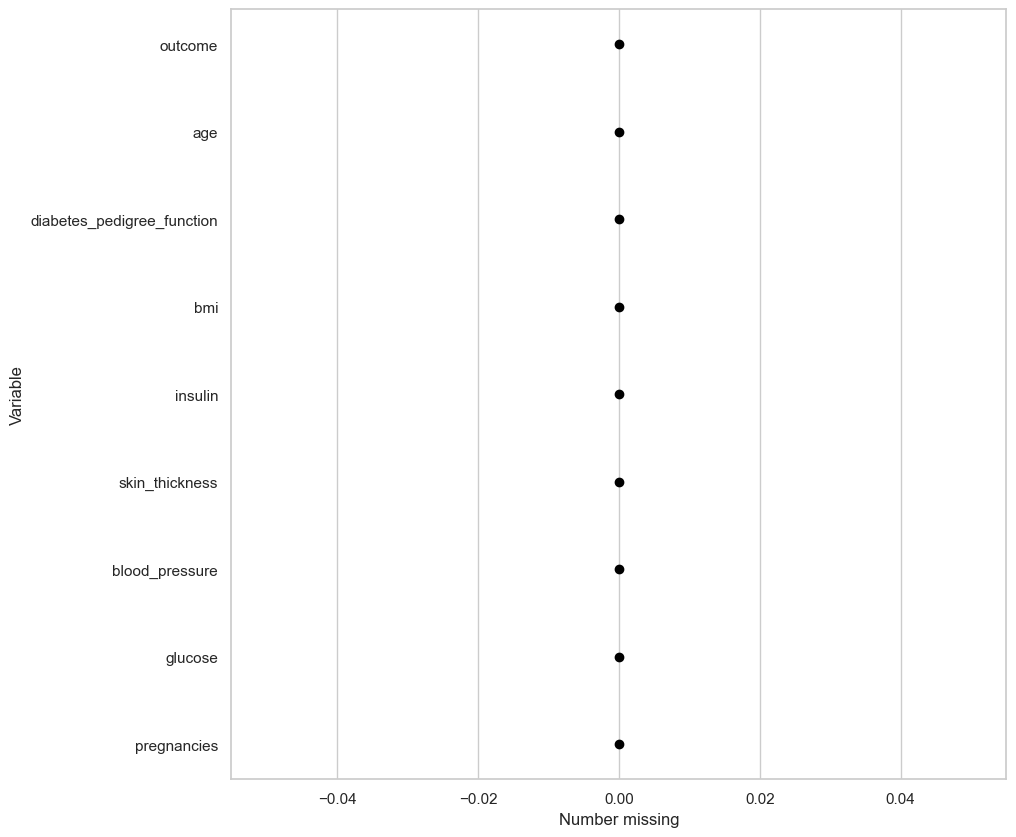

In [74]:
diabetes_df.missing.missing_variable_plot()

Con base en la gr√°fica anterior, podemos observar que no existen datos faltantes. Pero, es esto correcto? üëÄ

In [75]:
diabetes_df.columns

Index(['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
       'bmi', 'diabetes_pedigree_function', 'age', 'outcome'],
      dtype='object')

In [76]:
unq_cols_diabetes_df = diabetes_df.apply(pd.unique)

unq_cols_diabetes_df

pregnancies                   [Pregnancies, 6, 1, 8, 0, 5, 3, 10, 2, 4, 7, 9...
glucose                       [Glucose, 148, 85, 183, 89, 137, 116, 78, 115,...
blood_pressure                [BloodPressure, 72, 66, 64, 40, 74, 50, 0, 70,...
skin_thickness                [SkinThickness, 35, 29, 0, 23, 32, 45, 19, 47,...
insulin                       [Insulin, 0, 94, 168, 88, 543, 846, 175, 230, ...
bmi                           [BMI, 33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31, ...
diabetes_pedigree_function    [DiabetesPedigreeFunction, 0.627, 0.351, 0.672...
age                           [Age, 50, 31, 32, 21, 33, 30, 26, 29, 53, 54, ...
outcome                                                         [Outcome, 1, 0]
dtype: object

Para este caso particular, tiene sentido analizar en qu√© columnas ciertos valores tienen sentido y en cuales no... Por ejemplo, es razonable que haya una persona con 0 hijos, pero no alguna persona con BP de 0 üëÄ

In [77]:
unq_cols_diabetes_df["blood_pressure"].__contains__('0')

True

Y as√≠ con algunas otras caracteristicas dentro del dataframe...

In [78]:
unq_cols_diabetes_df["bmi"].__contains__('0')

True

In [79]:
unq_cols_diabetes_df["skin_thickness"].__contains__('0')

True

Con base en esto, ser√≠a necesario, determinar los tipos de datos dentro de estas columnas, el valor que puede representar la ausencia de ese dato dentro de la columna y entonces sustituirlo.

In [80]:
diabetes_df.dtypes

pregnancies                   object
glucose                       object
blood_pressure                object
skin_thickness                object
insulin                       object
bmi                           object
diabetes_pedigree_function    object
age                           object
outcome                       object
dtype: object

In [81]:
diabetes_df.replace(
    to_replace={
        "glucose": '0', #Inconpatible data based on the context
        "blood_pressure": '0', #Inconpatible data based on the context
        "skin_thickness": '0', #Inconpatible data based on the context
        "insulin": '0', #Inconpatible data based on the context
        "bmi": '0', #Inconpatible data based on the context
        "diabetes_pedigree_function": '0', #Likely to be a sign of missing information, thus, it could interpreted as NaN
    },
    value=np.nan,
    inplace=True
)

diabetes_df

pregnancies  glucose blood_pressure skin_thickness  insulin   bmi  \
0    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
1              6      148             72             35      NaN  33.6   
2              1       85             66             29      NaN  26.6   
3              8      183             64            NaN      NaN  23.3   
4              1       89             66             23       94  28.1   
..           ...      ...            ...            ...      ...   ...   
764           10      101             76             48      180  32.9   
765            2      122             70             27      NaN  36.8   
766            5      121             72             23      112  26.2   
767            1      126             60            NaN      NaN  30.1   
768            1       93             70             31      NaN  30.4   

    diabetes_pedigree_function  age  outcome  
0     DiabetesPedigreeFunction  Age  Outcome  
1                        0.627   50        1  
2                        0.351   31        0  
3                        0.672   32        1  
4                        0.167   21        0  
..                         ...  ...      ...  
764                      0.171   63        0  
765                       0.34   27        0  
766                      0.245   30        0  
767                      0.349   47        1  
768                      0.315   23        0  

[769 rows x 9 columns]

In [82]:
diabetes_df.isna().sum()

pregnancies                     0
glucose                         5
blood_pressure                 35
skin_thickness                227
insulin                       374
bmi                            11
diabetes_pedigree_function      0
age                             0
outcome                         0
dtype: int64

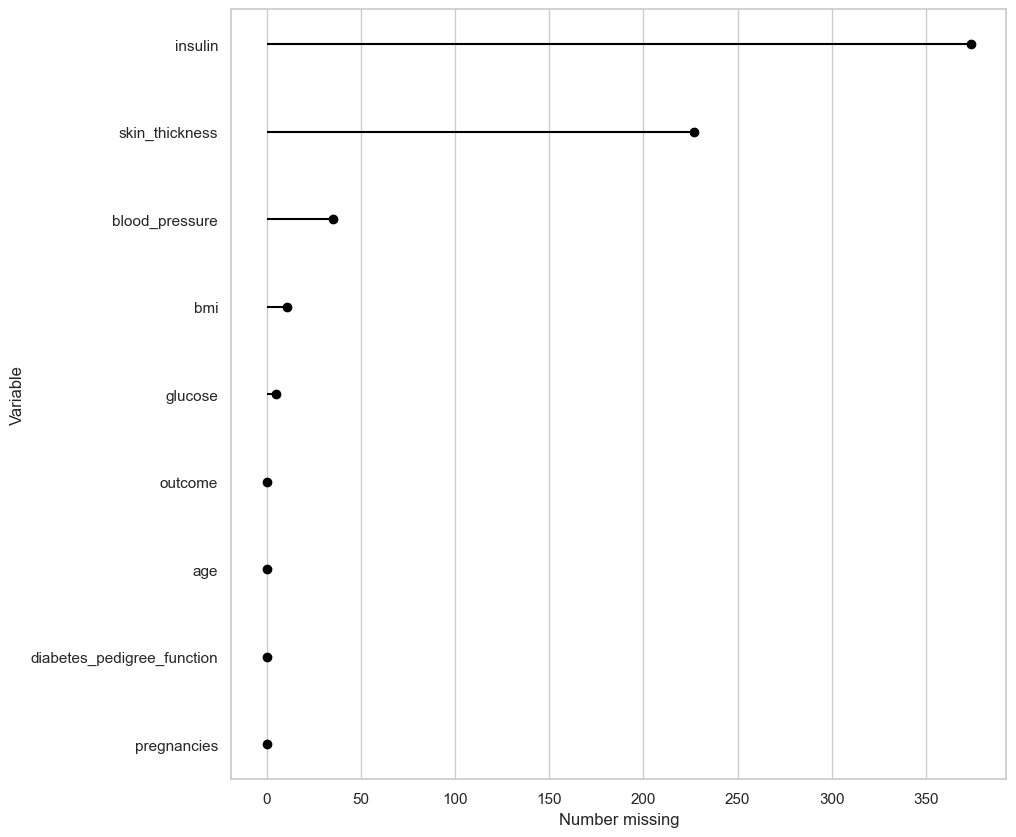

In [83]:
diabetes_df.missing.missing_variable_plot()

Ahora vemos que realmente s√≠ existen valores faltantes dentro de nuestro dataset, adem√°s, con esta forma visual podemos apreciar cu√°l variable es la que posee m√°s de ellos. 

## Missing Completely At Random (MCAR)

Para identificar si existe alguna frecuencia, intervalo de aparici√≥n o relaci√≥n con otra variable, podemos utilizar m√°s m√©todos visuales que nos ayuden a identificar la existencia de patrones

<Axes: >

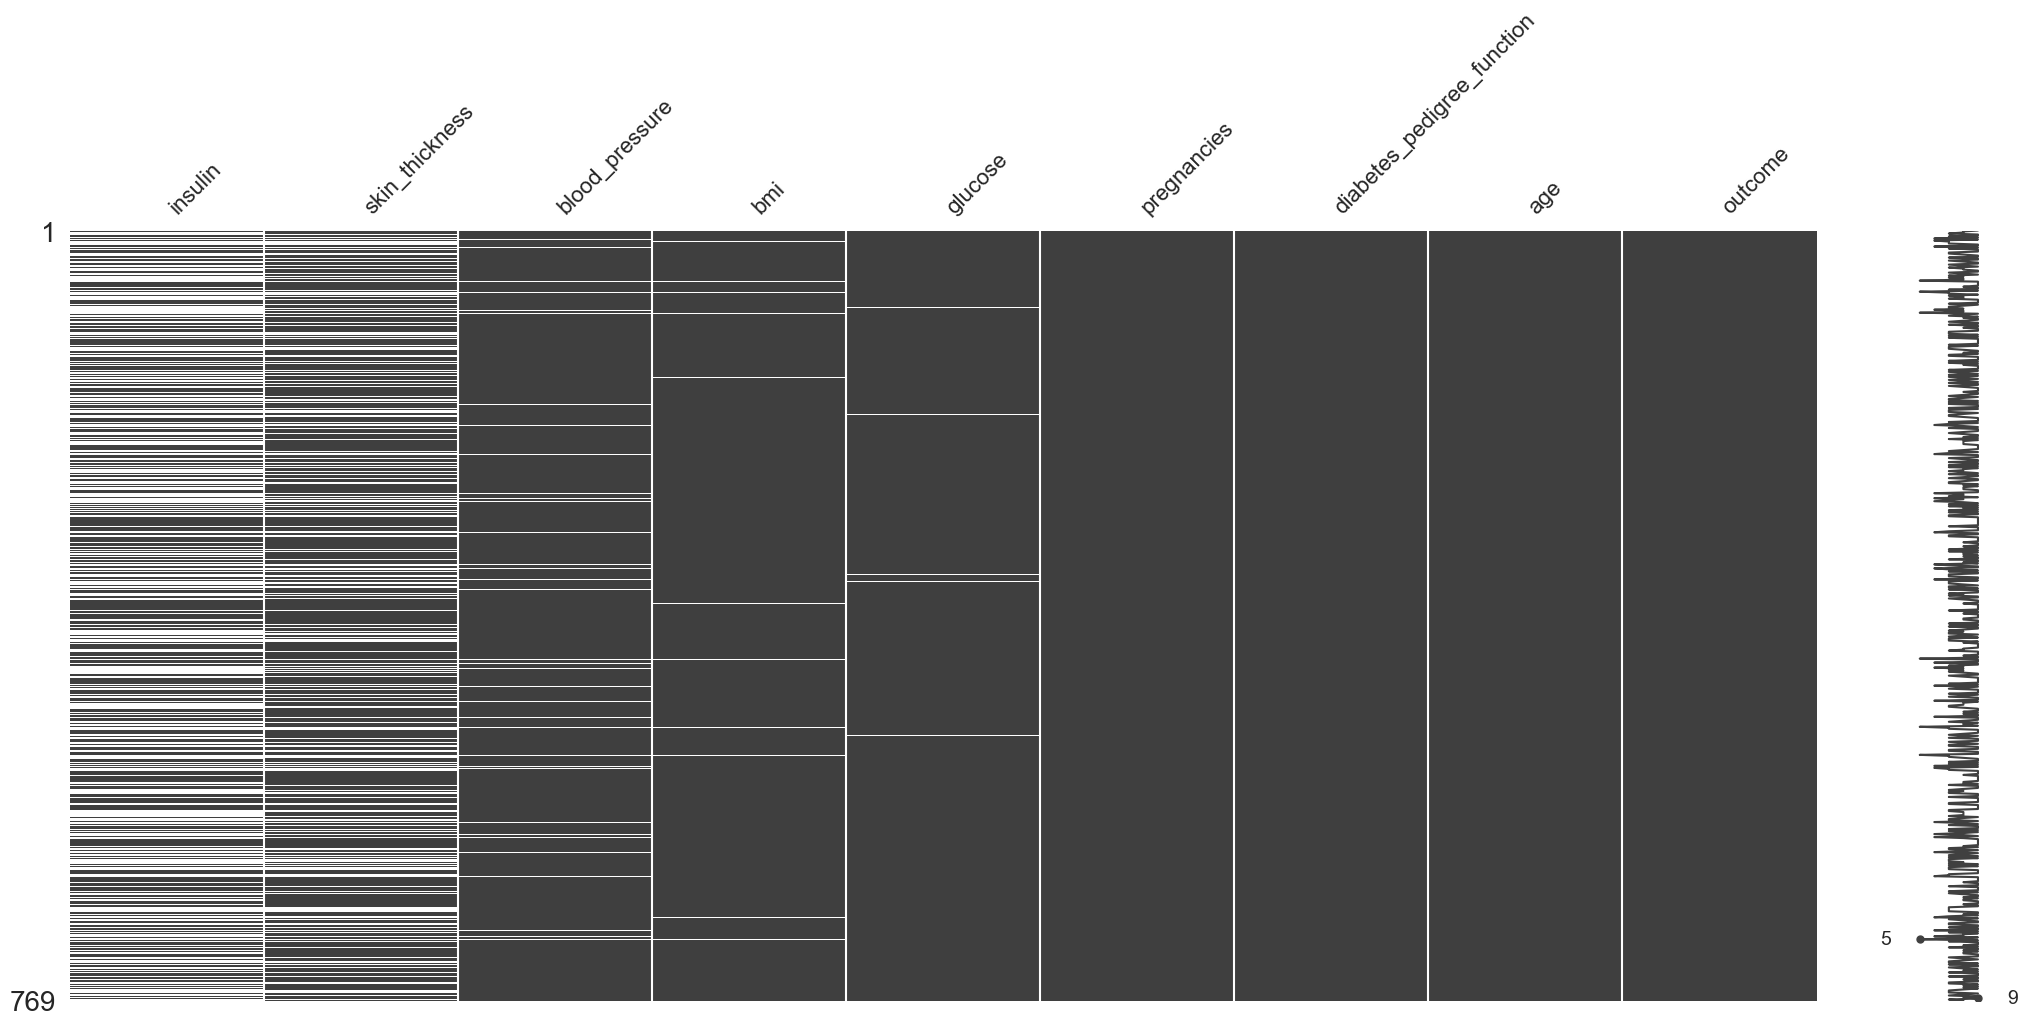

In [84]:
diabetes_df.missing.sort_variables_by_missingness().pipe(
    missingno.matrix
)

De momento, solo atrav√©s de ordenar las columnas con mayor cantidad de datos faltantes, no pareciera existir alguna relaci√≥n. Pero, ¬øes esto correcto?

## Missing At Random (MAR)

Para identificar si existe alguna relaci√≥n entre variables que posean datos faltantes, podemos seguir utilizando la metodolog√≠a visual, ahora ordenando en funci√≥n de las columnas que puedan estar relacionadas entre s√≠ y conociendo el contexto de las variables.

In [85]:
sorted_by_iba_missing_diabetes_df = diabetes_df.missing.sort_variables_by_missingness().sort_values(
    by = ["insulin", "blood_pressure", "age"]
)
sorted_by_iba_missing_diabetes_df

insulin skin_thickness blood_pressure   bmi glucose pregnancies  \
651     100             25             54  25.2      91           1   
468     100             36             64  36.8      97           0   
123     100             30             74  33.6     107           2   
121     100             56             76  53.2     162           0   
705     100             20             76  28.4     110           4   
..      ...            ...            ...   ...     ...         ...   
333     NaN            NaN            NaN  43.3     180           1   
704     NaN            NaN            NaN  38.5     129           2   
337     NaN            NaN            NaN  33.8     117           0   
358     NaN             30            NaN  39.9     129          13   
454     NaN            NaN            NaN  19.6     119           2   

    diabetes_pedigree_function age outcome  
651                      0.234  23       0  
468                        0.6  25       0  
123                      0.404  23       0  
121                      0.759  25       1  
705                      0.118  27       0  
..                         ...  ..     ...  
333                      0.282  41       1  
704                      0.304  41       0  
337                      0.932  44       0  
358                      0.569  44       1  
454                      0.832  72       0  

[769 rows x 9 columns]

<Axes: >

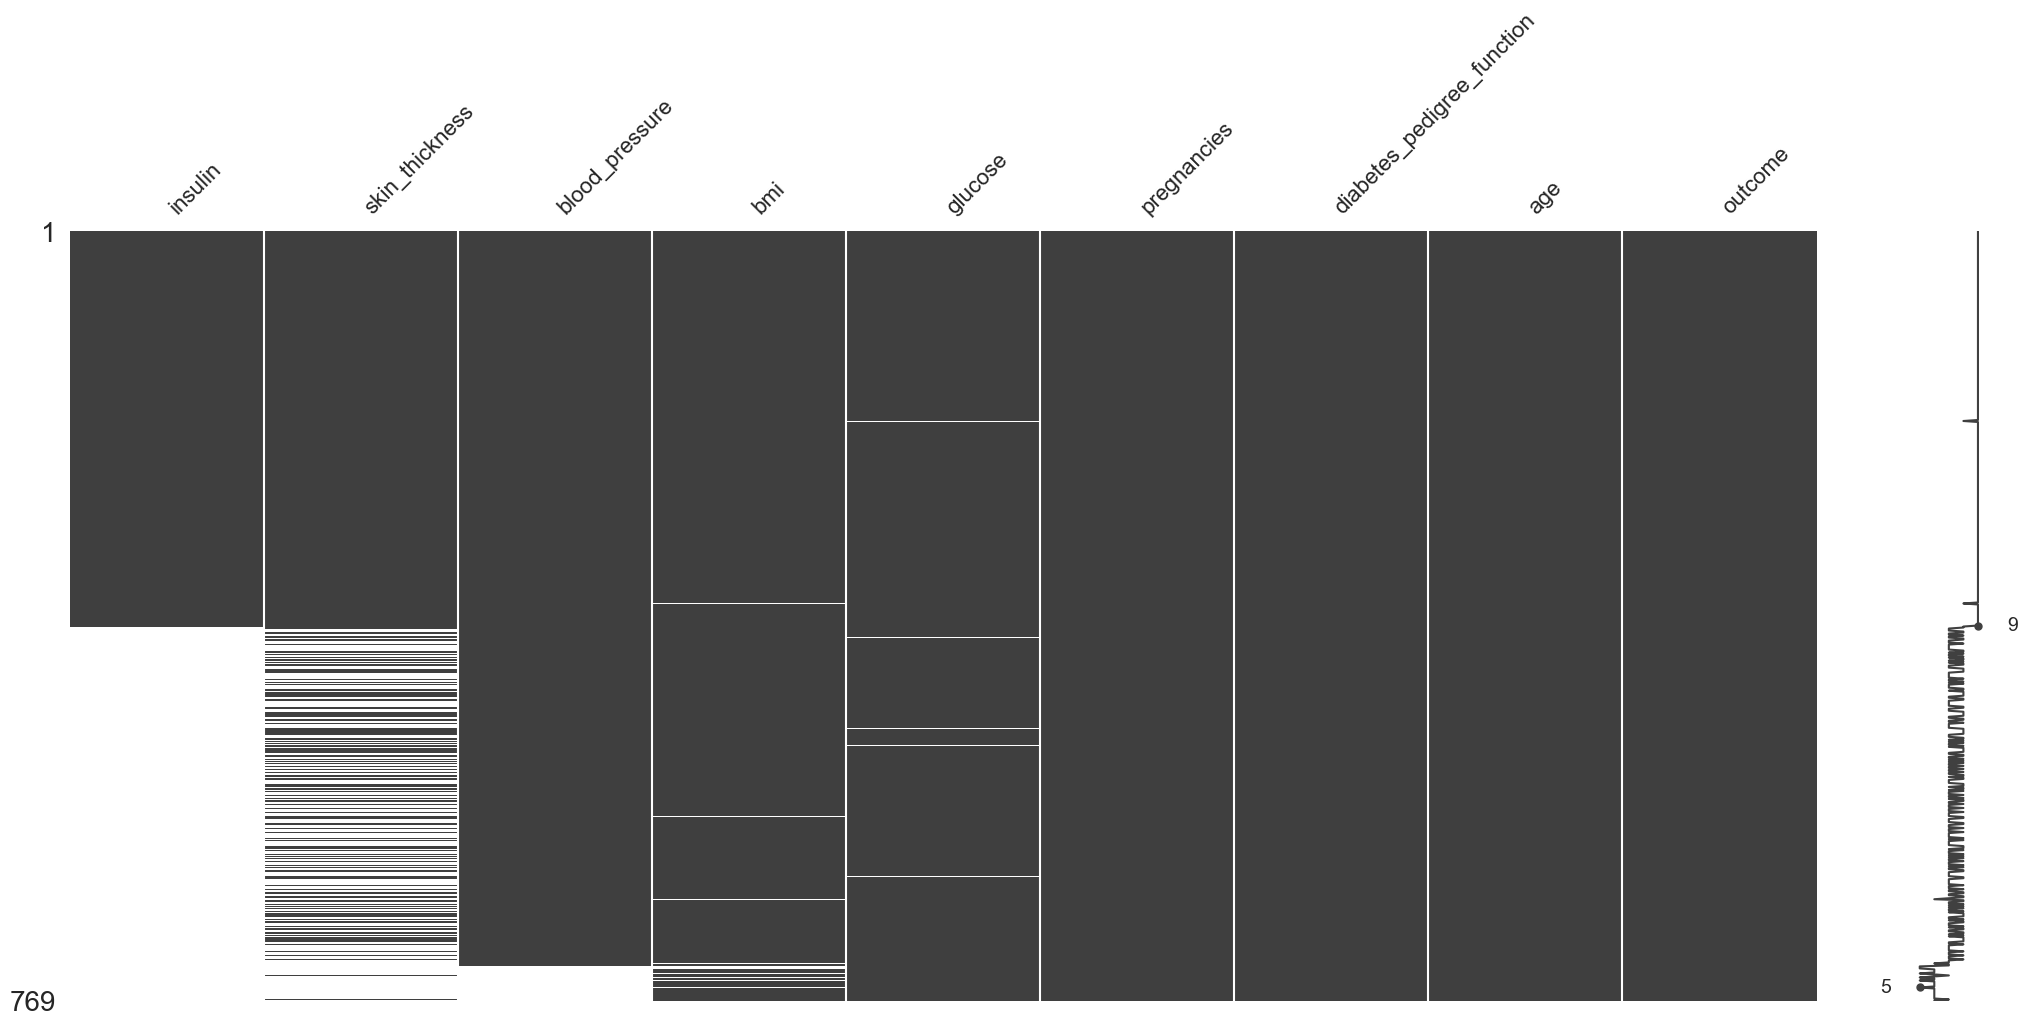

In [86]:
sorted_by_iba_missing_diabetes_df.pipe(
    missingno.matrix
)

In [87]:
sorted_by_ibp_missing_diabetes_df = diabetes_df.missing.sort_variables_by_missingness().sort_values(
    by = ["insulin", "blood_pressure", "pregnancies"]
)
sorted_by_ibp_missing_diabetes_df

insulin skin_thickness blood_pressure   bmi glucose pregnancies  \
651     100             25             54  25.2      91           1   
468     100             36             64  36.8      97           0   
123     100             30             74  33.6     107           2   
121     100             56             76  53.2     162           0   
705     100             20             76  28.4     110           4   
..      ...            ...            ...   ...     ...         ...   
602     NaN            NaN            NaN  23.7      96           6   
16      NaN            NaN            NaN    30     100           7   
50      NaN            NaN            NaN   NaN     105           7   
223     NaN            NaN            NaN  25.2     119           7   
469     NaN            NaN            NaN    30     120           8   

    diabetes_pedigree_function age outcome  
651                      0.234  23       0  
468                        0.6  25       0  
123                      0.404  23       0  
121                      0.759  25       1  
705                      0.118  27       0  
..                         ...  ..     ...  
602                       0.19  28       0  
16                       0.484  32       1  
50                       0.305  24       0  
223                      0.209  37       0  
469                      0.183  38       1  

[769 rows x 9 columns]

<Axes: >

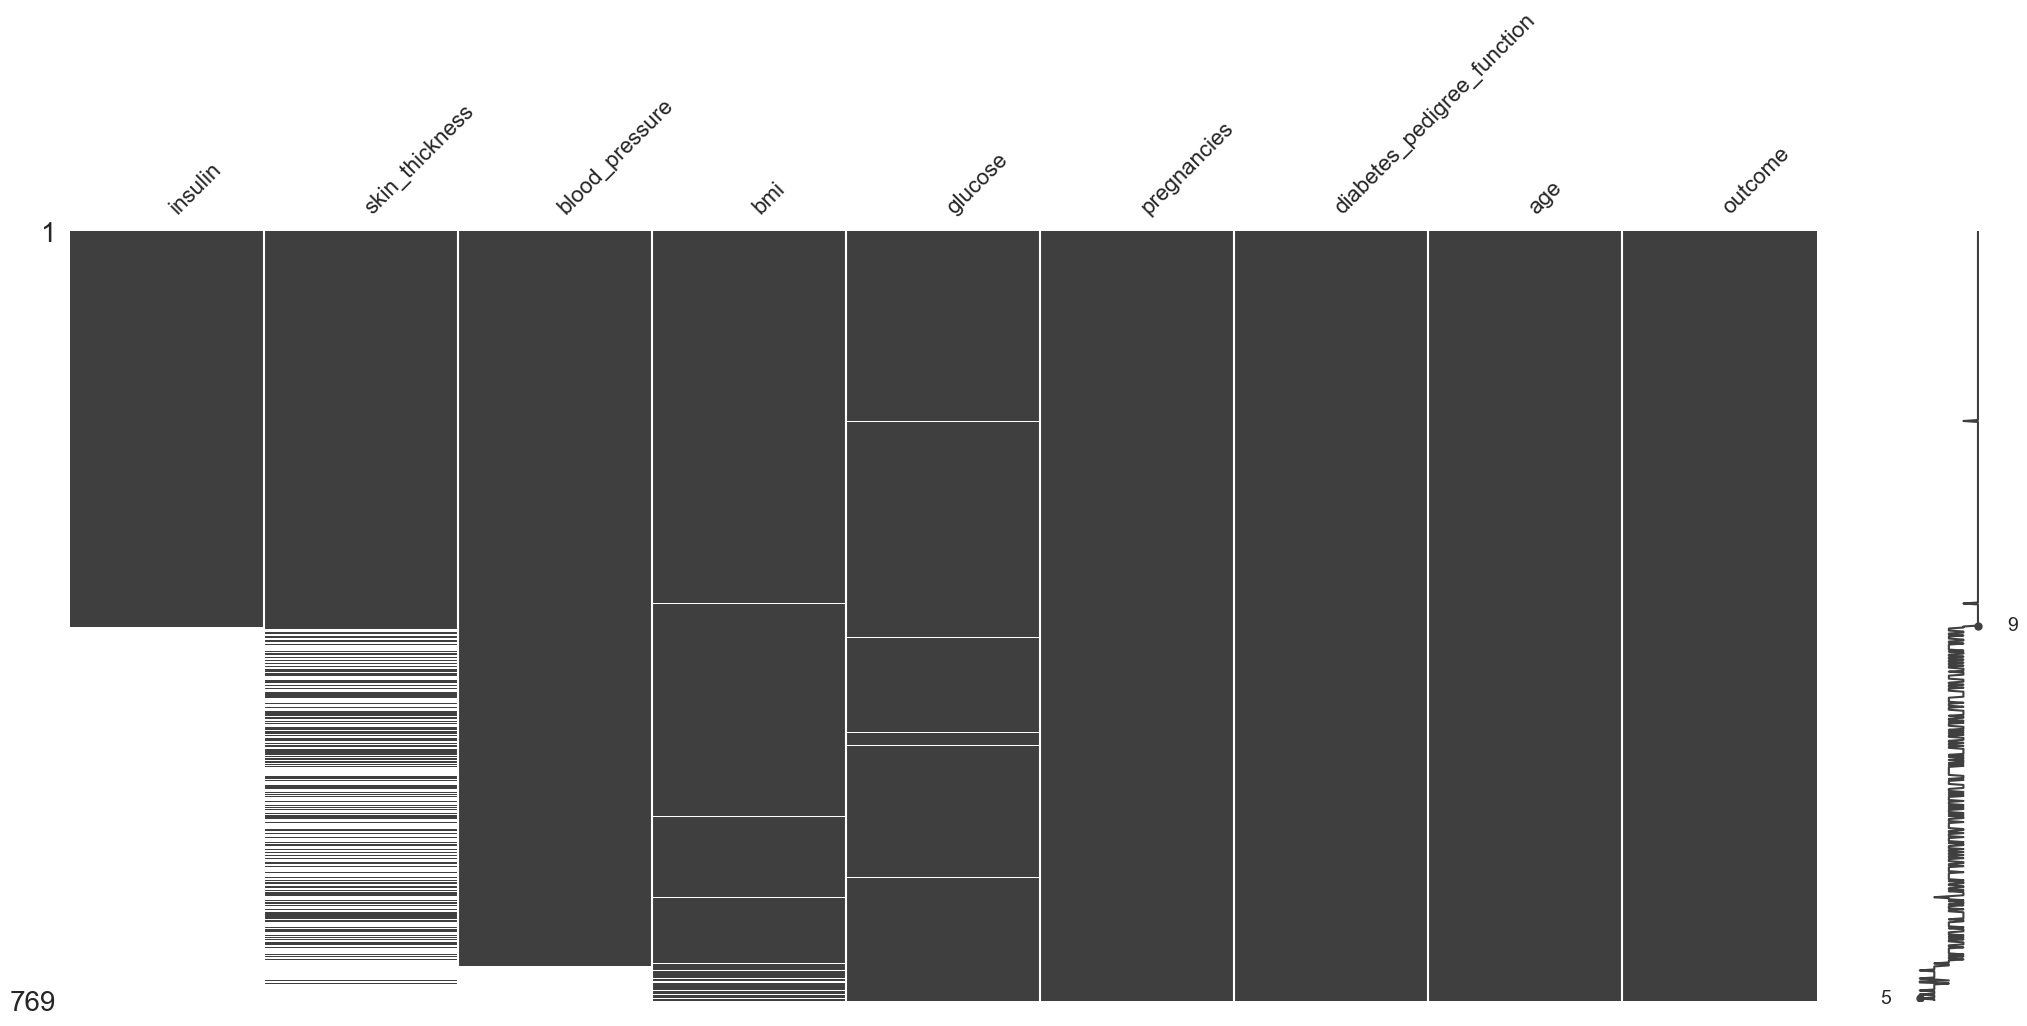

In [88]:
sorted_by_ibp_missing_diabetes_df.pipe(
    missingno.matrix
)

Realmente parecer√≠a que a medida que faltan los datos en la variable `insulin` tienden a faltar los datos de `skin_thickness`. Sin embargo, habr√≠a que explorar si esta relaci√≥n podr√≠a existir.

## Missing Not At Random (MNAR)

Ahora, para identificar si existe un mecanismo MNAR es m√°s complejo, ya que deber√≠amos conocer a mayor profundidad la naturaleza de las variables e incluso la metodolog√≠a de la recolecci√≥n, para saber entonces si es posible que la omisi√≥n haya sido totalmente dependiente de la naturaleza de dicha varibale y si existen factores intrinsecos a la misma que no hayan sido contemplados y sean los causantes de la no recolecci√≥n del mismo.

Por ejemplo, enfoquemonos en la variable `glucose`. En ella podemos observar que existen 5 registros que poseen valores faltantes, despu√©s de ordenar los datos en los mecanismos anteriores, parecen tener una distribuci√≥n no relacionada a la presencia de otra variable. ¬øPodemos identificar si es una causa instr√≠nseca?

In [89]:
na_at_glucose_diabetes_df = diabetes_df[diabetes_df["glucose"].isna()]
na_at_glucose_diabetes_df

pregnancies glucose blood_pressure skin_thickness insulin   bmi  \
76            1     NaN             48             20     NaN  24.7   
183           1     NaN             74             20      23  27.7   
343           1     NaN             68             35     NaN    32   
350           5     NaN             80             32     NaN    41   
503           6     NaN             68             41     NaN    39   

    diabetes_pedigree_function age outcome  
76                        0.14  22       0  
183                      0.299  21       0  
343                      0.389  22       0  
350                      0.346  37       1  
503                      0.727  41       1

De los registros que no cuentan con este valor, falta casi en la misma frecuencia `insulin`. Podr√≠amos comenzar a pensar que tal vez esta medici√≥n pudo no ser registrada por los instrumentos, tal vez, por ser un valor muy elevado al capaz de ser registrado en los dispositivos utilizados. Con base en el `outcome`, 2 de esos registros fueron categorizados como "diabeticas", tendr√≠a sentido entonces pensar, que la elevanci√≥n gluc√©mica fue tan alta que ning√∫n parametro (`glucose` & `insulin`) pudo ser medido. Algo similar podr√≠a ser con las otras que no fueron categorizadas como "diabeticas", en donde una medici√≥n aislada pudo ocasionar esto. 

# Matriz de sombra: Shadow Matrix

Es una herramienta muy √∫til, ya que permite visualizar patrones y relaciones entre las ausencias en distintas variables de un dataset. B√°sicamente, se trata de una **nueva matriz** derivada del conjunto de **datos original**, en la cual se reemplazan los valores faltantes **y no faltantes por indicadores binarios**: un ‚Äú1‚Äù representa un valor faltante y un ‚Äú0‚Äù indica la presencia de un valor.

**Ventajas:**
* La matriz de sombra facilita la identificaci√≥n de estos patrones y relaciones sin tener que analizar manualmente cada combinaci√≥n de valores faltantes, lo que puede ser muy tedioso en datasets grandes. 
* Cuando existen correlaciones significativas entre las ausencias, la matriz de sombra permite emplear m√©todos estad√≠sticos para explorarlas de manera m√°s objetiva y profunda.

## ¬øC√≥mo se construye una matriz de sombra?

![](./media/shadow_matrix_steps.png)

Una vez obtenida la tabla con los valores explicitos y su representacion en nulo y no nulo, podemos combinar estas tablas en una llamada "Nabular" 
![](./media/shadow_matrix_nabular.png)

## Cronstruyendo una shadow matrix

Para la construcci√≥n de nuestra matriz, utilizaremos el conjunto de datos `riskfactors_df`. Podriamos observar de manera superficial la cantidad de datos faltantes dentro de este.

In [ ]:
null_counts = riskfactors_df.isnull().sum()
null_counts = null_counts[null_counts > 0]
null_counts

weight_lbs           10
height_inch           2
bmi                  11
marital               1
pregnant            215
education             1
veteran               3
hispanic              2
health_poor         113
provide_care          3
activity_limited      3
drink_any             2
drink_days          134
drink_average       135
smoke_100             2
smoke_days          128
smoke_stop          212
smoke_last          161
diet_fruit            8
diet_salad            8
diet_potato           8
diet_carrot           8
diet_vegetable        8
diet_juice            8
dtype: int64

Generamos la matriz de sombra...

In [100]:
shadow_matrix = riskfactors_df.isnull().replace(
    to_replace={
        True: "Missing", 
        False: "Not Missing"
    }
).add_suffix("_NA")
shadow_matrix

state_NA       sex_NA       age_NA weight_lbs_NA height_inch_NA  \
0    Not Missing  Not Missing  Not Missing   Not Missing    Not Missing   
1    Not Missing  Not Missing  Not Missing   Not Missing    Not Missing   
2    Not Missing  Not Missing  Not Missing   Not Missing    Not Missing   
3    Not Missing  Not Missing  Not Missing   Not Missing    Not Missing   
4    Not Missing  Not Missing  Not Missing   Not Missing    Not Missing   
..           ...          ...          ...           ...            ...   
240  Not Missing  Not Missing  Not Missing   Not Missing    Not Missing   
241  Not Missing  Not Missing  Not Missing   Not Missing    Not Missing   
242  Not Missing  Not Missing  Not Missing   Not Missing    Not Missing   
243  Not Missing  Not Missing  Not Missing   Not Missing    Not Missing   
244  Not Missing  Not Missing  Not Missing   Not Missing    Not Missing   

          bmi_NA   marital_NA pregnant_NA  children_NA education_NA  ...  \
0    Not Missing  Not Missing     Missing  Not Missing  Not Missing  ...   
1    Not Missing  Not Missing     Missing  Not Missing  Not Missing  ...   
2    Not Missing  Not Missing     Missing  Not Missing  Not Missing  ...   
3    Not Missing  Not Missing     Missing  Not Missing  Not Missing  ...   
4    Not Missing  Not Missing     Missing  Not Missing  Not Missing  ...   
..           ...          ...         ...          ...          ...  ...   
240  Not Missing  Not Missing     Missing  Not Missing  Not Missing  ...   
241  Not Missing  Not Missing     Missing  Not Missing  Not Missing  ...   
242  Not Missing  Not Missing     Missing  Not Missing  Not Missing  ...   
243  Not Missing  Not Missing     Missing  Not Missing  Not Missing  ...   
244  Not Missing  Not Missing     Missing  Not Missing  Not Missing  ...   

    smoke_100_NA smoke_days_NA smoke_stop_NA smoke_last_NA diet_fruit_NA  \
0    Not Missing       Missing       Missing       Missing   Not Missing   
1    Not Missing       Missing       Missing       Missing   Not Missing   
2    Not Missing       Missing       Missing       Missing   Not Missing   
3    Not Missing       Missing       Missing       Missing       Missing   
4    Not Missing   Not Missing   Not Missing       Missing   Not Missing   
..           ...           ...           ...           ...           ...   
240  Not Missing       Missing       Missing       Missing   Not Missing   
241  Not Missing       Missing       Missing       Missing   Not Missing   
242  Not Missing   Not Missing       Missing   Not Missing   Not Missing   
243  Not Missing   Not Missing   Not Missing       Missing   Not Missing   
244  Not Missing   Not Missing       Missing   Not Missing   Not Missing   

    diet_salad_NA diet_potato_NA diet_carrot_NA diet_vegetable_NA  \
0     Not Missing    Not Missing    Not Missing       Not Missing   
1     Not Missing    Not Missing    Not Missing       Not Missing   
2     Not Missing    Not Missing    Not Missing       Not Missing   
3         Missing        Missing        Missing           Missing   
4     Not Missing    Not Missing    Not Missing       Not Missing   
..            ...            ...            ...               ...   
240   Not Missing    Not Missing    Not Missing       Not Missing   
241   Not Missing    Not Missing    Not Missing       Not Missing   
242   Not Missing    Not Missing    Not Missing       Not Missing   
243   Not Missing    Not Missing    Not Missing       Not Missing   
244   Not Missing    Not Missing    Not Missing       Not Missing   

    diet_juice_NA  
0     Not Missing  
1     Not Missing  
2     Not Missing  
3         Missing  
4     Not Missing  
..            ...  
240   Not Missing  
241   Not Missing  
242   Not Missing  
243   Not Missing  
244   Not Missing  

[245 rows x 34 columns]

Creamos la matriz "Nabular"

In [101]:
nabular_matrix = pd.concat(
    objs=[
        riskfactors_df,
        shadow_matrix
    ],
    axis="columns"
)

nabular_matrix

state     sex  age weight_lbs height_inch    bmi   marital pregnant  \
0      26  Female   49        190          64  32.68   Married      NaN   
1      40  Female   48        170          68  25.90  Divorced      NaN   
2      72  Female   55        163          64  28.04   Married      NaN   
3      42    Male   42        230          74  29.59   Married      NaN   
4      32  Female   66        135          62  24.74   Widowed      NaN   
..    ...     ...  ...        ...         ...    ...       ...      ...   
240    10  Female   79        144          63  25.56   Widowed      NaN   
241    46    Male   45        170          74  21.87  Divorced      NaN   
242    15    Male   62        175          71  24.46  Divorced      NaN   
243    34  Female   62        138          64  23.74   Married      NaN   
244    18    Male    9        200          70  28.76   Married      NaN   

     children education  ... smoke_100_NA smoke_days_NA smoke_stop_NA  \
0           0         6  ...  Not Missing       Missing       Missing   
1           0         5  ...  Not Missing       Missing       Missing   
2           0         4  ...  Not Missing       Missing       Missing   
3           1         6  ...  Not Missing       Missing       Missing   
4           0         5  ...  Not Missing   Not Missing   Not Missing   
..        ...       ...  ...          ...           ...           ...   
240         0         4  ...  Not Missing       Missing       Missing   
241         2         4  ...  Not Missing       Missing       Missing   
242         0         6  ...  Not Missing   Not Missing       Missing   
243         0         4  ...  Not Missing   Not Missing   Not Missing   
244         0         4  ...  Not Missing   Not Missing       Missing   

    smoke_last_NA diet_fruit_NA  diet_salad_NA  diet_potato_NA diet_carrot_NA  \
0         Missing   Not Missing    Not Missing     Not Missing    Not Missing   
1         Missing   Not Missing    Not Missing     Not Missing    Not Missing   
2         Missing   Not Missing    Not Missing     Not Missing    Not Missing   
3         Missing       Missing        Missing         Missing        Missing   
4         Missing   Not Missing    Not Missing     Not Missing    Not Missing   
..            ...           ...            ...             ...            ...   
240       Missing   Not Missing    Not Missing     Not Missing    Not Missing   
241       Missing   Not Missing    Not Missing     Not Missing    Not Missing   
242   Not Missing   Not Missing    Not Missing     Not Missing    Not Missing   
243       Missing   Not Missing    Not Missing     Not Missing    Not Missing   
244   Not Missing   Not Missing    Not Missing     Not Missing    Not Missing   

    diet_vegetable_NA diet_juice_NA  
0         Not Missing   Not Missing  
1         Not Missing   Not Missing  
2         Not Missing   Not Missing  
3             Missing       Missing  
4         Not Missing   Not Missing  
..                ...           ...  
240       Not Missing   Not Missing  
241       Not Missing   Not Missing  
242       Not Missing   Not Missing  
243       Not Missing   Not Missing  
244       Not Missing   Not Missing  

[245 rows x 68 columns]

En nuestra extensi√≥n de la librer√≠a de pandas disponemos de una funci√≥n para acelerar este proceso. La funci√≥n `bind_shadow_matrix()` nos producir√° esta "Nabular" matrix sin realizar tantas lineas de c√≥digo de manera repetitiva.

In [104]:
nabular_matrix_from_extension = riskfactors_df.missing.bind_shadow_matrix()
nabular_matrix_from_extension

state     sex  age weight_lbs height_inch    bmi   marital pregnant  \
0      26  Female   49        190          64  32.68   Married      NaN   
1      40  Female   48        170          68  25.90  Divorced      NaN   
2      72  Female   55        163          64  28.04   Married      NaN   
3      42    Male   42        230          74  29.59   Married      NaN   
4      32  Female   66        135          62  24.74   Widowed      NaN   
..    ...     ...  ...        ...         ...    ...       ...      ...   
240    10  Female   79        144          63  25.56   Widowed      NaN   
241    46    Male   45        170          74  21.87  Divorced      NaN   
242    15    Male   62        175          71  24.46  Divorced      NaN   
243    34  Female   62        138          64  23.74   Married      NaN   
244    18    Male    9        200          70  28.76   Married      NaN   

     children education  ... smoke_100_NA smoke_days_NA smoke_stop_NA  \
0           0         6  ...  Not Missing       Missing       Missing   
1           0         5  ...  Not Missing       Missing       Missing   
2           0         4  ...  Not Missing       Missing       Missing   
3           1         6  ...  Not Missing       Missing       Missing   
4           0         5  ...  Not Missing   Not Missing   Not Missing   
..        ...       ...  ...          ...           ...           ...   
240         0         4  ...  Not Missing       Missing       Missing   
241         2         4  ...  Not Missing       Missing       Missing   
242         0         6  ...  Not Missing   Not Missing       Missing   
243         0         4  ...  Not Missing   Not Missing   Not Missing   
244         0         4  ...  Not Missing   Not Missing       Missing   

    smoke_last_NA diet_fruit_NA  diet_salad_NA  diet_potato_NA diet_carrot_NA  \
0         Missing   Not Missing    Not Missing     Not Missing    Not Missing   
1         Missing   Not Missing    Not Missing     Not Missing    Not Missing   
2         Missing   Not Missing    Not Missing     Not Missing    Not Missing   
3         Missing       Missing        Missing         Missing        Missing   
4         Missing   Not Missing    Not Missing     Not Missing    Not Missing   
..            ...           ...            ...             ...            ...   
240       Missing   Not Missing    Not Missing     Not Missing    Not Missing   
241       Missing   Not Missing    Not Missing     Not Missing    Not Missing   
242   Not Missing   Not Missing    Not Missing     Not Missing    Not Missing   
243       Missing   Not Missing    Not Missing     Not Missing    Not Missing   
244   Not Missing   Not Missing    Not Missing     Not Missing    Not Missing   

    diet_vegetable_NA diet_juice_NA  
0         Not Missing   Not Missing  
1         Not Missing   Not Missing  
2         Not Missing   Not Missing  
3             Missing       Missing  
4         Not Missing   Not Missing  
..                ...           ...  
240       Not Missing   Not Missing  
241       Not Missing   Not Missing  
242       Not Missing   Not Missing  
243       Not Missing   Not Missing  
244       Not Missing   Not Missing  

[245 rows x 68 columns]

Con esta tabla ahora disponible, podr√≠amos comenzar a realizar exploraciones estadisticas sobre la relaci√≥n entre variables faltantes y no faltantes.

In [109]:
nabular_matrix.groupby(["smoke_stop_NA"])["age"].describe()

count       mean        std   min   25%   50%   75%   max
smoke_stop_NA                                                           
Missing        212.0  58.759434  18.011678   7.0  48.0  60.0  71.0  97.0
Not Missing     33.0  53.909091  13.241421  21.0  45.0  54.0  62.0  86.0

In [117]:
nabular_matrix.groupby(["pregnant_NA"])["age"].describe()

count       mean        std  min   25%   50%   75%   max
pregnant_NA                                                          
Missing      215.0  61.590698  15.430577  9.0  52.0  62.0  71.5  97.0
Not Missing   30.0  33.133333   9.212934  7.0  29.5  34.0  40.0  44.0

## Visualizaci√≥n de valores faltantes a trav√©s de Nabular Matrix

A partir de la tabla Nabular, podemos obtener visualizaciones para los datos faltantes de nuestro dataframe. Para esta secci√≥n, crearemos una nueva tabla Nabular que solo agregue las columnas con sufijo `"_NA"` si la columna tiene valores faltantes.

In [120]:
nabular_only_missing_matrix = riskfactors_df.missing.bind_shadow_matrix(only_missing=True)
nabular_only_missing_matrix

state     sex  age weight_lbs height_inch    bmi   marital pregnant  \
0      26  Female   49        190          64  32.68   Married      NaN   
1      40  Female   48        170          68  25.90  Divorced      NaN   
2      72  Female   55        163          64  28.04   Married      NaN   
3      42    Male   42        230          74  29.59   Married      NaN   
4      32  Female   66        135          62  24.74   Widowed      NaN   
..    ...     ...  ...        ...         ...    ...       ...      ...   
240    10  Female   79        144          63  25.56   Widowed      NaN   
241    46    Male   45        170          74  21.87  Divorced      NaN   
242    15    Male   62        175          71  24.46  Divorced      NaN   
243    34  Female   62        138          64  23.74   Married      NaN   
244    18    Male    9        200          70  28.76   Married      NaN   

     children education  ... smoke_100_NA smoke_days_NA smoke_stop_NA  \
0           0         6  ...  Not Missing       Missing       Missing   
1           0         5  ...  Not Missing       Missing       Missing   
2           0         4  ...  Not Missing       Missing       Missing   
3           1         6  ...  Not Missing       Missing       Missing   
4           0         5  ...  Not Missing   Not Missing   Not Missing   
..        ...       ...  ...          ...           ...           ...   
240         0         4  ...  Not Missing       Missing       Missing   
241         2         4  ...  Not Missing       Missing       Missing   
242         0         6  ...  Not Missing   Not Missing       Missing   
243         0         4  ...  Not Missing   Not Missing   Not Missing   
244         0         4  ...  Not Missing   Not Missing       Missing   

    smoke_last_NA diet_fruit_NA  diet_salad_NA  diet_potato_NA diet_carrot_NA  \
0         Missing   Not Missing    Not Missing     Not Missing    Not Missing   
1         Missing   Not Missing    Not Missing     Not Missing    Not Missing   
2         Missing   Not Missing    Not Missing     Not Missing    Not Missing   
3         Missing       Missing        Missing         Missing        Missing   
4         Missing   Not Missing    Not Missing     Not Missing    Not Missing   
..            ...           ...            ...             ...            ...   
240       Missing   Not Missing    Not Missing     Not Missing    Not Missing   
241       Missing   Not Missing    Not Missing     Not Missing    Not Missing   
242   Not Missing   Not Missing    Not Missing     Not Missing    Not Missing   
243       Missing   Not Missing    Not Missing     Not Missing    Not Missing   
244   Not Missing   Not Missing    Not Missing     Not Missing    Not Missing   

    diet_vegetable_NA diet_juice_NA  
0         Not Missing   Not Missing  
1         Not Missing   Not Missing  
2         Not Missing   Not Missing  
3             Missing       Missing  
4         Not Missing   Not Missing  
..                ...           ...  
240       Not Missing   Not Missing  
241       Not Missing   Not Missing  
242       Not Missing   Not Missing  
243       Not Missing   Not Missing  
244       Not Missing   Not Missing  

[245 rows x 58 columns]

Con base en ella, podemos visualizar la agrupaci√≥n de datos anterior en un `boxplot`, por ejemplo.

<Axes: xlabel='smoke_stop_NA', ylabel='age'>

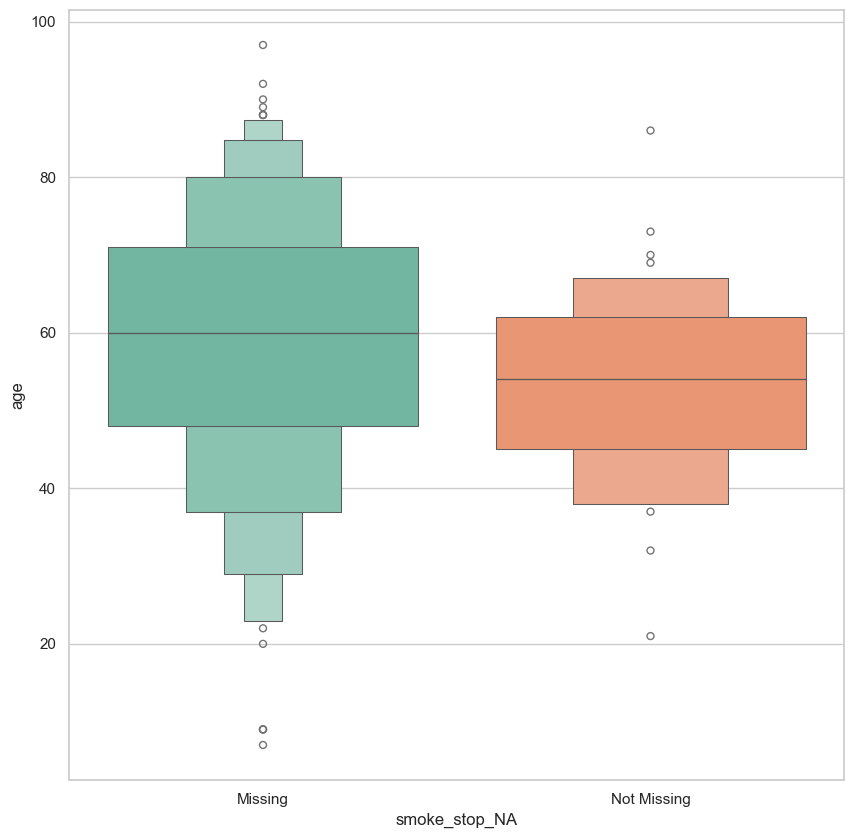

In [125]:
import seaborn as sns

sns.boxenplot(
    data=nabular_only_missing_matrix,
    x="smoke_stop_NA",
    y="age",
    hue="smoke_stop_NA",
    palette="Set2"
)

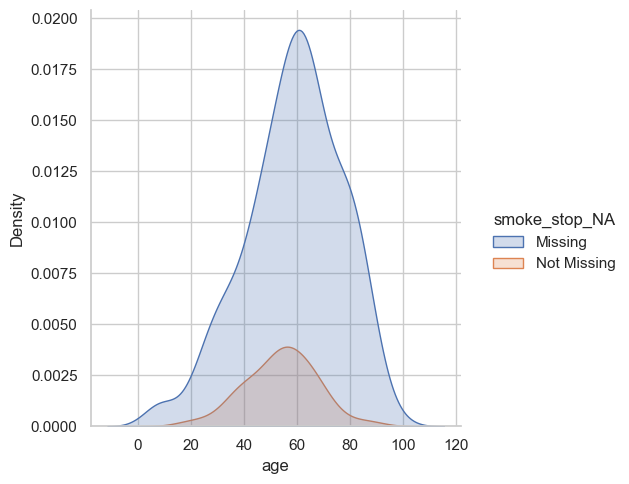

In [127]:
sns.displot(
    data=nabular_only_missing_matrix,
    x="age",
    hue="smoke_stop_NA",
    kind="kde",
    fill=True
)

<Axes: xlabel='pregnant_NA', ylabel='age'>

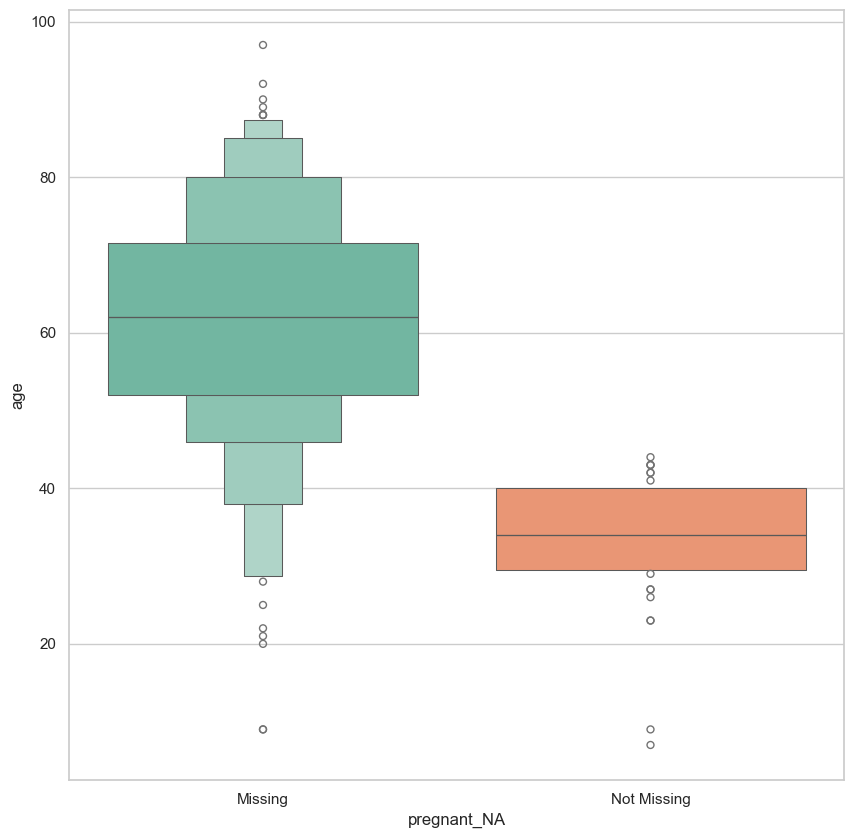

In [126]:
sns.boxenplot(
    data=nabular_only_missing_matrix,
    x="pregnant_NA",
    y="age",
    hue="pregnant_NA",
    palette="Set2"
)

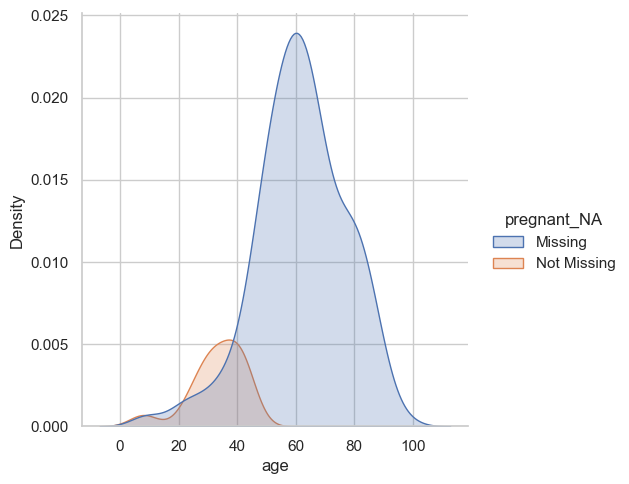

In [128]:
sns.displot(
    data=nabular_only_missing_matrix,
    x="age",
    hue="pregnant_NA",
    kind="kde",
    fill=True
)

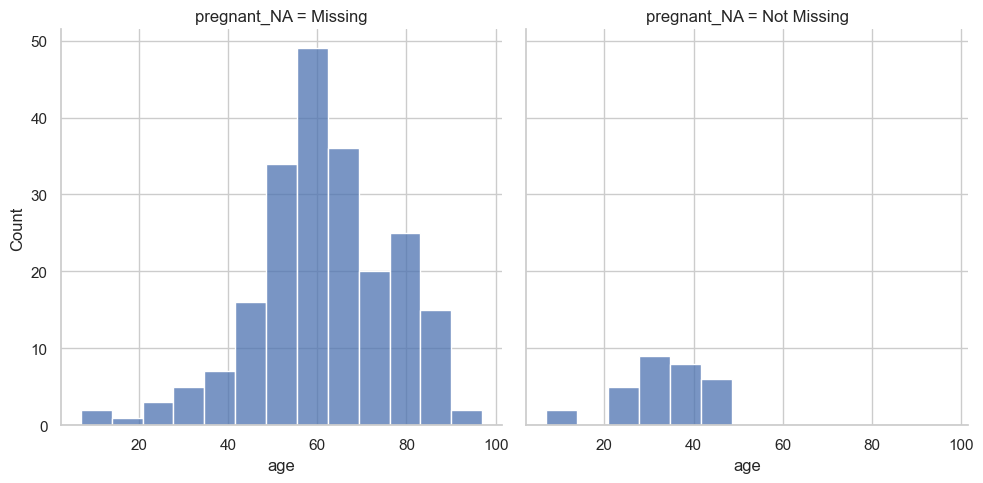

In [129]:
sns.displot(
    data=nabular_only_missing_matrix,
    x="age",
    col="pregnant_NA"
)

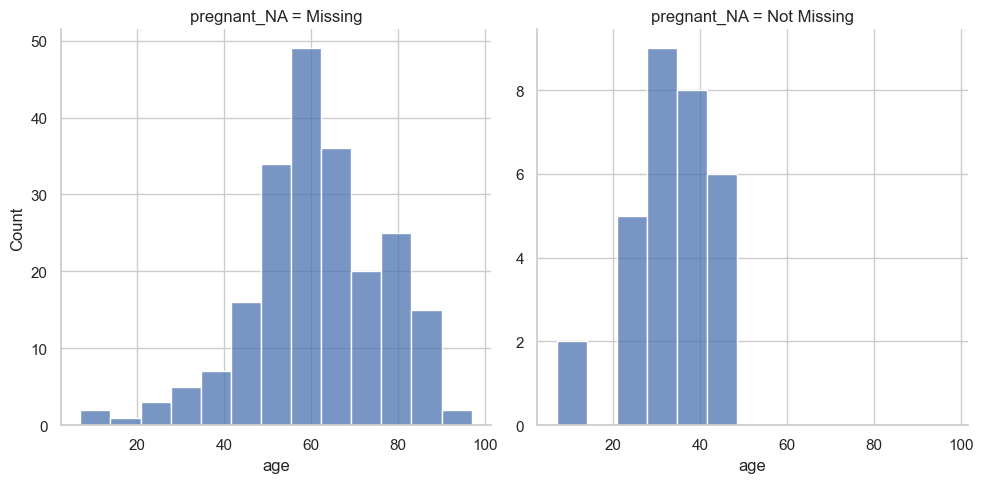

In [130]:
sns.displot(
    data=nabular_only_missing_matrix,
    x="age",
    col="pregnant_NA",
    facet_kws={
        "sharey": False
    }
)

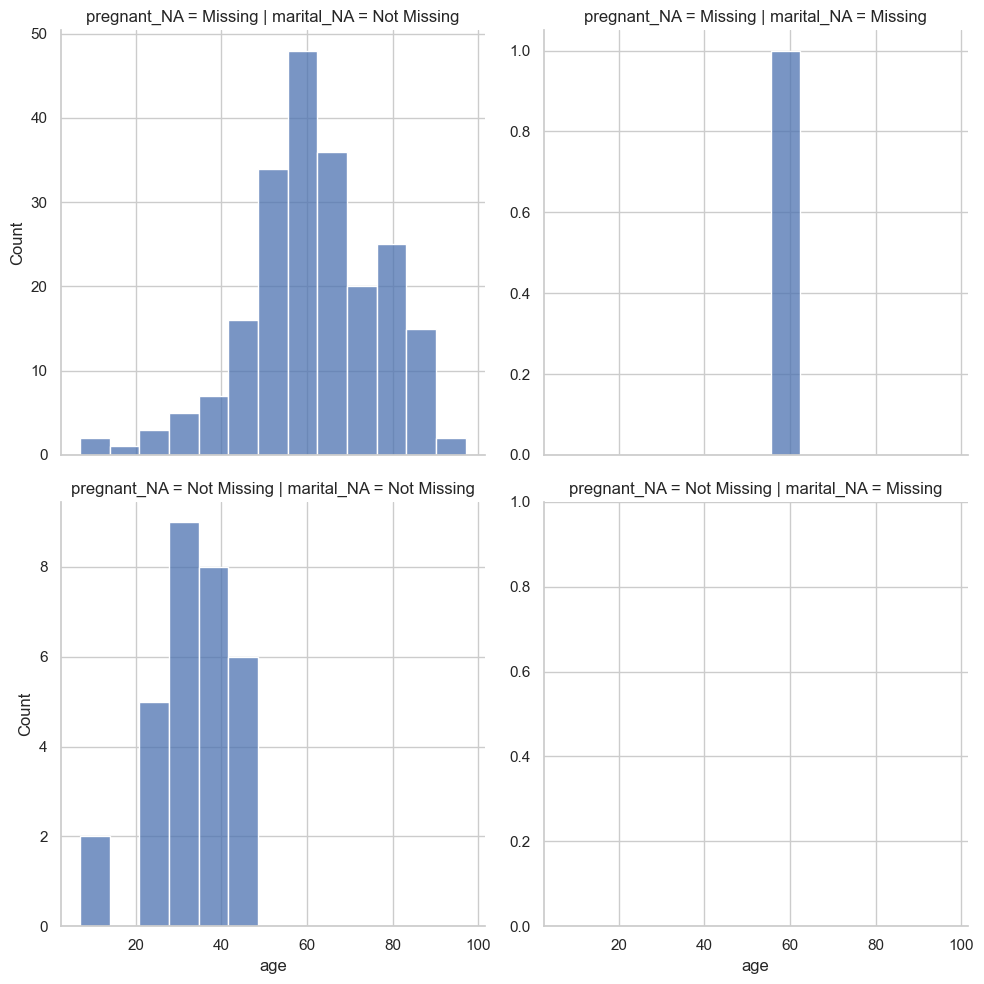

In [131]:
sns.displot(
    data=nabular_only_missing_matrix,
    x="age",
    col="marital_NA",
    row="pregnant_NA",
    facet_kws={
        "sharey": False
    }
)